# Insurance Claim Fraud Detection

## Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

## Independent Variables

    1. months_as_customer: Number of months of patronage
        
    2. age: the length of time a customer has lived or a thing has existed
        
    3. policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
        
    4. policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
        
    5. policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
        
    6. policy_csl: is basically Combined Single Limit
        
    7. policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
        
    8. policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
        
    9. umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
        
    10. insured_zip: It is the zip code where the insurance was made
        
    11. insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
        
    12. insured_education_level: This refers to the Level of education of the customer
        
    13. insured_occupation: This refers Occupation of the customer
        
    14. insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
        
    15. insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
    
    16. capital-gains: This refers to profit accrued due to insurance premium
        
    17. capital-loss: This refers to the losses incurred due to insurance claims
        
    18. incident_date: This refers to the date which claims where made by customers
        
    19. incident_type: This refers to the type of claim/vehicle damage made by customer
        
    20. collision_type: This refers to the area of damage on the vehicle
        
    21. incident_severity: This refers to the extent/level of damage
        
    22. authorities_contacted: This refers to the government agencies that were contacted after damage
        
    23. incident_state: This refers to the state at which the accident happened
        
    24. incident_city: This refers to the city at which the accident happened
        
    25. 1ncident_location: This refers to the location at which the accident happened
        
    26. incident_hour_of_the_day: The period of the day which accident took place
        
    27. number_of_vehicles_involved: This refers to number of vehicles involved the accident
        
    28. property_damage: This refers to whether property was damaged or not
        
    29. bodily_injuries: This refers to injuries sustained
        
    30. witnesses: This refers to the number of witnesses involved
        
    31. police_report_available: This refers to whether the report on damage was documented or not
        
    32. total_claim_amount: This refers to the financial implications involved in claims
        
    33. injury_claim: This refers to physical injuries sustained
        
    34. property_claim: This refers to property damages during incident
        
    35. vehicle_claim: This refers to property damages during incident
        
    36. auto_make: This refers to the make of the vehicle
        
    37. auto_model: This refers to the model of the vehicle
        
    38. auto_year: This refers to the year which the vehicle was manufactured
            
    39. _c39:
        
    40. fraud_reported

In [2176]:
# Importing required libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2177]:
# Importing the dataset

insurance = pd.read_csv('Automobile_insurance_fraud.csv',skipinitialspace=True)
insurance.head(3)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  

[3 rows x 40 columns]

# Exploratory Data Analysis (EDA)

## Data Preprocessing

In [2178]:
# Checking the dimension of the dataset

insurance.shape

(1000, 40)

In [2179]:
# Checking the features present in the dataset

insurance.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [2180]:
# Checking the information about the dataset

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [2181]:
# Checking the null values present in the dataset

insurance.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [2182]:
# Checking if any duplicate rows present in the dataset

dup = insurance[insurance.duplicated()]
dup.shape

(0, 40)

In [2183]:
# Checking th unique values present in the dataset

insurance.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [2184]:
# Checking the count of values present in the dataset

pd.set_option('display.max_rows',None)

for i in insurance.columns:
    print(insurance[i].value_counts())
    print('*****************************************')

194    8
128    7
254    7
140    7
210    7
230    7
285    7
101    7
239    6
126    6
259    6
163    6
156    6
257    6
255    6
147    6
65     6
61     6
222    6
289    6
246    6
290    6
245    6
295    6
107    6
286    5
284    5
80     5
78     5
85     5
269    5
186    5
266    5
108    5
253    5
103    5
27     5
298    5
143    5
134    5
137    5
165    5
241    5
264    5
169    5
211    5
235    5
233    4
142    4
209    4
32     4
252    4
122    4
270    4
398    4
280    4
124    4
371    4
267    4
274    4
41     4
219    4
225    4
123    4
84     4
228    4
261    4
120    4
328    4
271    4
204    4
146    4
166    4
64     4
303    4
97     4
152    4
130    4
150    4
160    4
70     4
180    4
121    4
212    4
256    4
297    4
276    4
195    4
229    4
175    4
96     4
283    4
215    4
91     4
154    4
22     4
119    4
234    3
330    3
1      3
272    3
446    3
110    3
458    3
190    3
177    3
86     3
111    3
294    3
73     3
75     3
2

In [2185]:
# Dropping the feature _c39 for null values

insurance.drop(['_c39'],axis=1,inplace=True)

In [2186]:
# Dropping the feature policy_number 

insurance.drop(['policy_number'],axis=1,inplace=True)

In [2187]:
# Splitting the policy_bind_date

insurance['Policy_Year'] = pd.DatetimeIndex(insurance['policy_bind_date']).year
insurance['Policy_Month'] = pd.DatetimeIndex(insurance['policy_bind_date']).month
insurance['Policy_Day'] = pd.DatetimeIndex(insurance['policy_bind_date']).day

In [2188]:
# Splitting the incident_date

insurance['Incident_Year'] = pd.DatetimeIndex(insurance['incident_date']).year
insurance['Incident_Month'] = pd.DatetimeIndex(insurance['incident_date']).month
insurance['Incident_Day'] = pd.DatetimeIndex(insurance['incident_date']).day

In [2189]:
# Dropping the columns policy_bind_date and incident_date

insurance.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)
insurance.shape

(1000, 42)

In [2190]:
# Dropping the column incident_location

insurance.drop(['incident_location',],axis=1,inplace=True)

In [2191]:
# Splitting the dataset by Categorical and Numerical

insurance_cat =[]

for i in insurance.columns:
    if insurance[i].dtypes=='object':
        insurance_cat.append(i)
        
insurance_num=[]
for i in insurance.columns:
    if insurance[i].dtypes!='object':
        insurance_num.append(i)

print('Categorical Features',insurance_cat)
print('Numerical Features',insurance_num)

Categorical Features ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
Numerical Features ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'Policy_Year', 'Policy_Month', 'Policy_Day', 'Incident_Year', 'Incident_Month', 'Incident_Day']


In [2192]:
# Checking the dimension of the dataset

insurance.shape

(1000, 41)

### Observations

Imported required libraries and dataset

Insurance Claim Fraud Detection dataset contains 1000 rows and 40 columns

Data types present in the dataset are float64 – 2, int64 -17 and object – 21

Null values are present in the feature  ‘_c39’, hence dropped the column

Duplicate rows are not found in the dataset

Analysed each feature by checking the count of values present in the dataset, based on which found ‘unknown’ values present in the columns collision_type, property_damage and police_report_available

Dropped column policy_number as it is a unique ID, which is more of a serial number and it will not be much relevant for Model prediction

Dropped columns policy_bind_date and incident_date as it was split into Year,Month and Day

Dropped column incident_location which contains 1000 unique values and the data type is object, if encoded it will give us unique values for entire rows which will not be much relevant for Model prediction

Dataset contains 1000 rows and 39 columns, after dropping the features '_c39', 'policy_number', 'policy_bind_date',
'incident_date' and 'incident_location'

Dataset was split into Categorical and Numerical features

Target variable fraud_reported is categorical and Classification algorithms will be used to evaluate and predict the model

# Data Visualization

## Univariate Analysis

<AxesSubplot:>

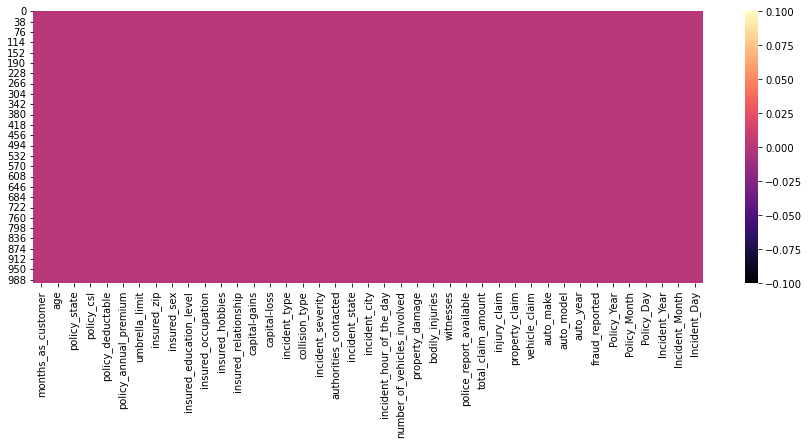

In [2193]:
# Visualizing the dataset with heatmap

plt.figure(figsize=(15,5))
sns.heatmap(insurance.isnull(),cmap='magma')

### Observations

Above heatmap shows no null values are present in the dataset

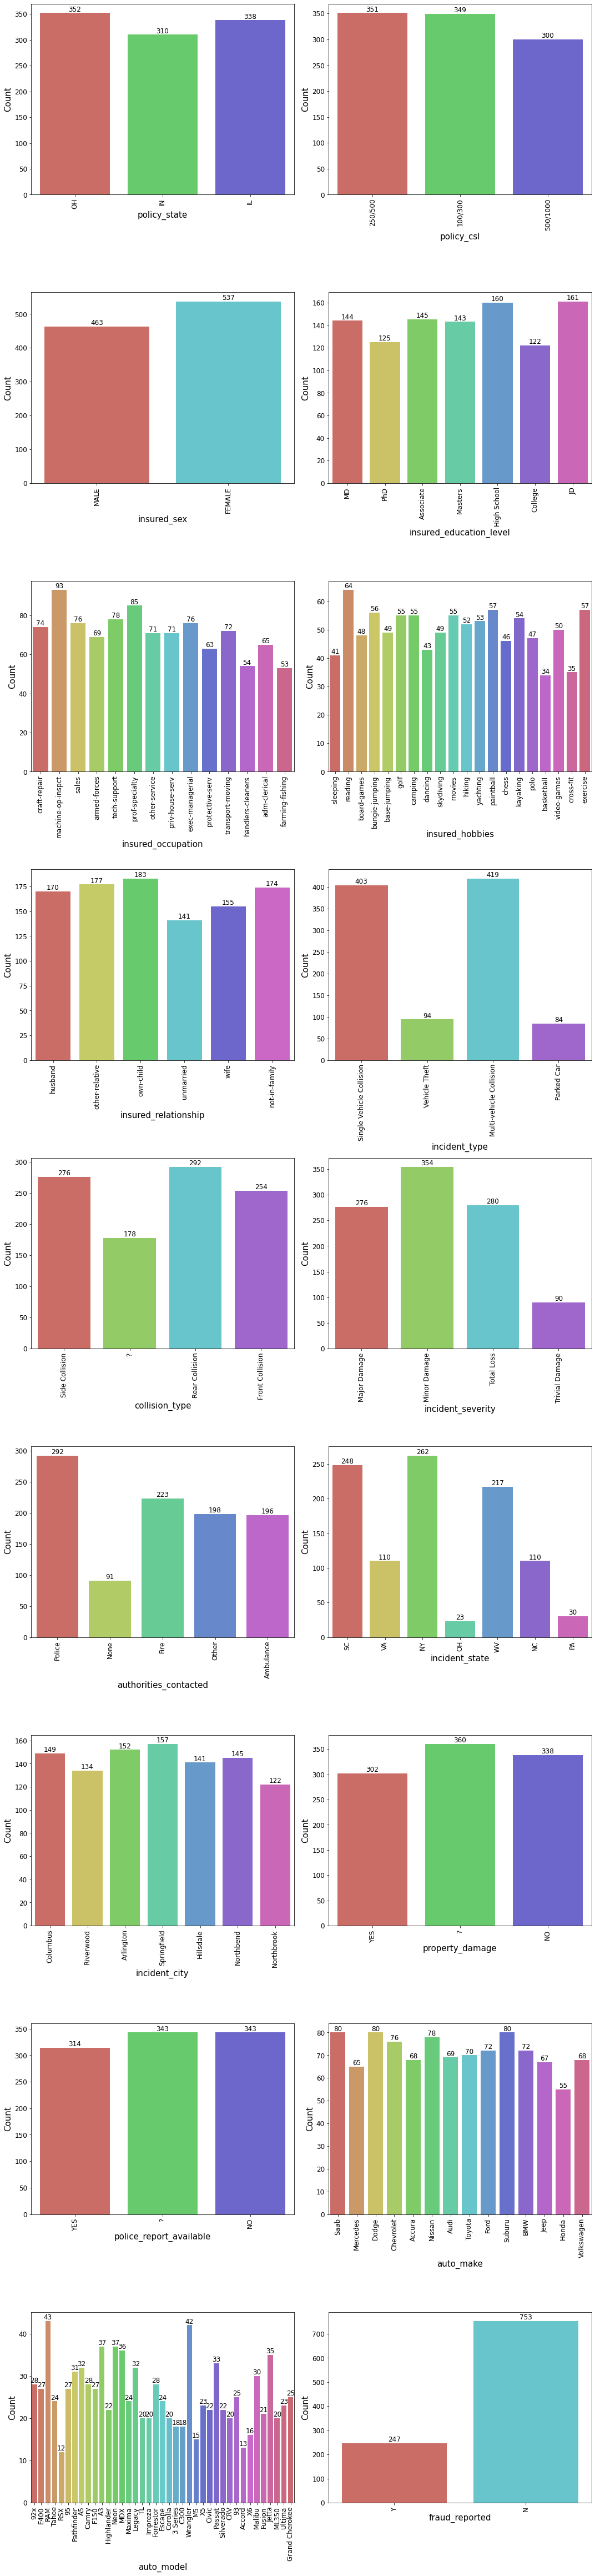

In [2194]:
# Visualizing the categorical columns with countplot

cat = ['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies',
       'insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted',
       'incident_state','incident_city','property_damage','police_report_available','auto_make',
       'auto_model','fraud_reported']

plt.figure(figsize=(15,70))
plot_cat = 1

for i in cat:
    if plot_cat <=19:
        sp = plt.subplot(10,2,plot_cat)
        sns.countplot(insurance[i],palette='hls')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize=15)
        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(fontsize=12)
    plot_cat+=1

    for j in sp.containers:
        sp.bar_label(j,fontsize=12)

plt.tight_layout()   

### Observations

Based on count plot we can observe

Maximum claims are submitted from the state of OH – Ohio

policy_csl count is high in 250/500 

In overall claims submitted, Female count is higher than Male

Education level of insured are maximum in JD, High School, Associate, MD and Masters

Based on insured_occupation, claims submitted by machine-op-inspct has the maximum count followed by prof-specialty and tech-support

If we look into insured_hobbies, maximum people have their hobbies as reading, exercise, paintball,
bungie-jumping, golf, camping and movies

insured_relationship count is maximum in own-child, other relative, not-in-family and husband

Multi-vehicle Collision count is maximum followed by Single Vehicle Collision in incident_type

In collision_type Rear Collision count is maximum followed by Side Collision and unknown collision_type is found with 178 count

Minor Damage count is maximum in incident_severity, followed by Total Loss and Major Damage

Police and Fire count are maximum in authorities_contacted, followed by Other and Ambulance

If we look into incident_state NY, SC and WV have the maximum count

Springfield, Arlington, Columbus, Northbend and Hillsdale count are high in incident_city

In property_damage, unknown count is high and next to it is No and Yes

In police_report_available, unknown and No count is high and next to it is Yes

Suburu, Dodge, Saab, Nissan and Chevrolet counts are high in auto_make

RAM, Wrangler, A3, Neon, MDX and Jetta counts are high in auto_model 

Maximum count of fraud_reported is No

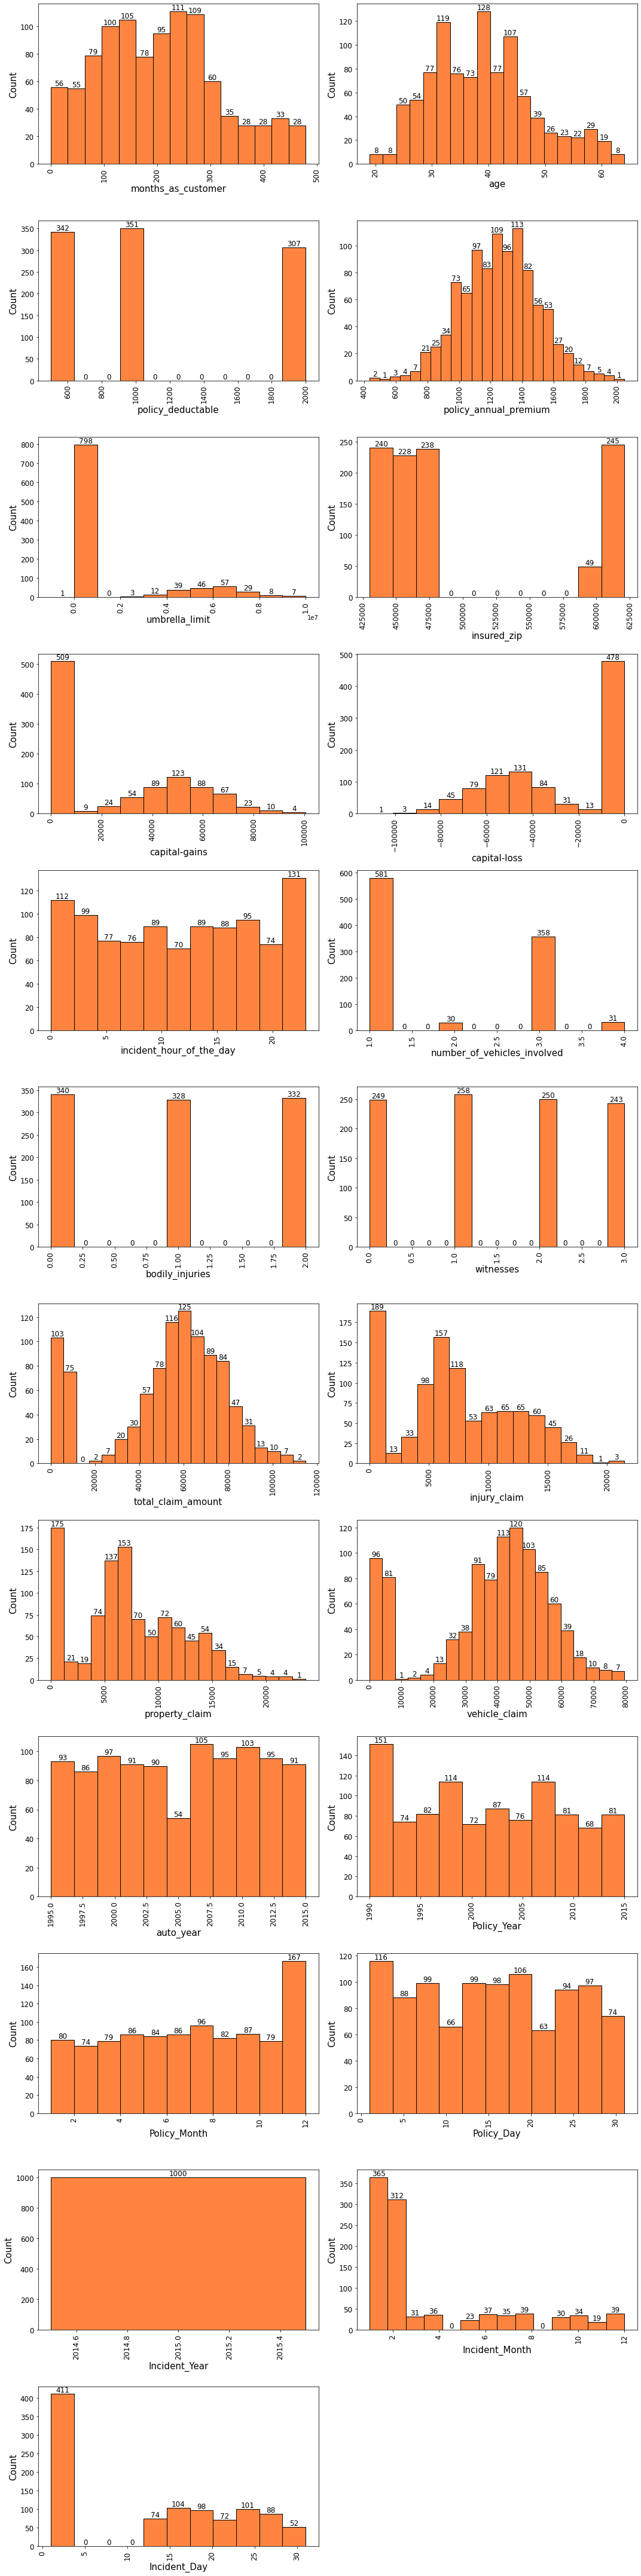

In [2195]:
# Visualizing the Numerical columns with histplot

plt.figure(figsize=(15,60))
plot_num = 1

for i in insurance_num:
    if plot_num <=23:
        sp = plt.subplot(12,2,plot_num)
        sns.histplot(insurance, x = insurance[i],color='#ff5b00')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize=15)
        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(fontsize=12)
    plot_num+=1

    for j in sp.containers:
        sp.bar_label(j,fontsize=12)

plt.tight_layout()

### Observations

Based on above histplot, we can observe

months_as_customer counts are maximum between 70 to 300

Age of the customers are maximum between 30 to 50

Customer’s with policy_deductable amount of 1000 is maximum, followed by 500 and 2000

Policy_annual_premium amount is maximum between 1000 to 1600

Customer’s with 0 umbrella limit and Customer’s with 0 capital-gains and capital loss are high

Hours of incident(incident_hours) are maximum reported between 21 to 4 hours of the day 

Number_of_vehicles_involved count are maximum 1 followed by 3

Bodily_injuries 0,1 and 2 are almost equal but 0 count is high compared with others

Witnesses count 1 is maximum, followed by 2,0 and 3

Total_claim_amount are mostly between 40000 to 80000 and 2000 to 8000

Injury claim and Property_claim are maximum between 300 to 15000

Vehicle_claim are maximum between 30000 to 60000 and 1000 to 6000

Most of the vehicles manufactured from the year 2000 and maximum count are between 2006 to 2012

Policy Year(Policy_Bind_Year) are mostly between 1900 to 1993, 1995 to 2000 and 2005 to 2010

Policy Month(Policy_Bind_Month) are maximum towards end of the year in Nov and Dec, Policy Day are maximum in first cycle
of the month

Incident Year(incident_date) are reported only in 2015

Incident Month(incident_date) are mostly reported during first quarter of the year

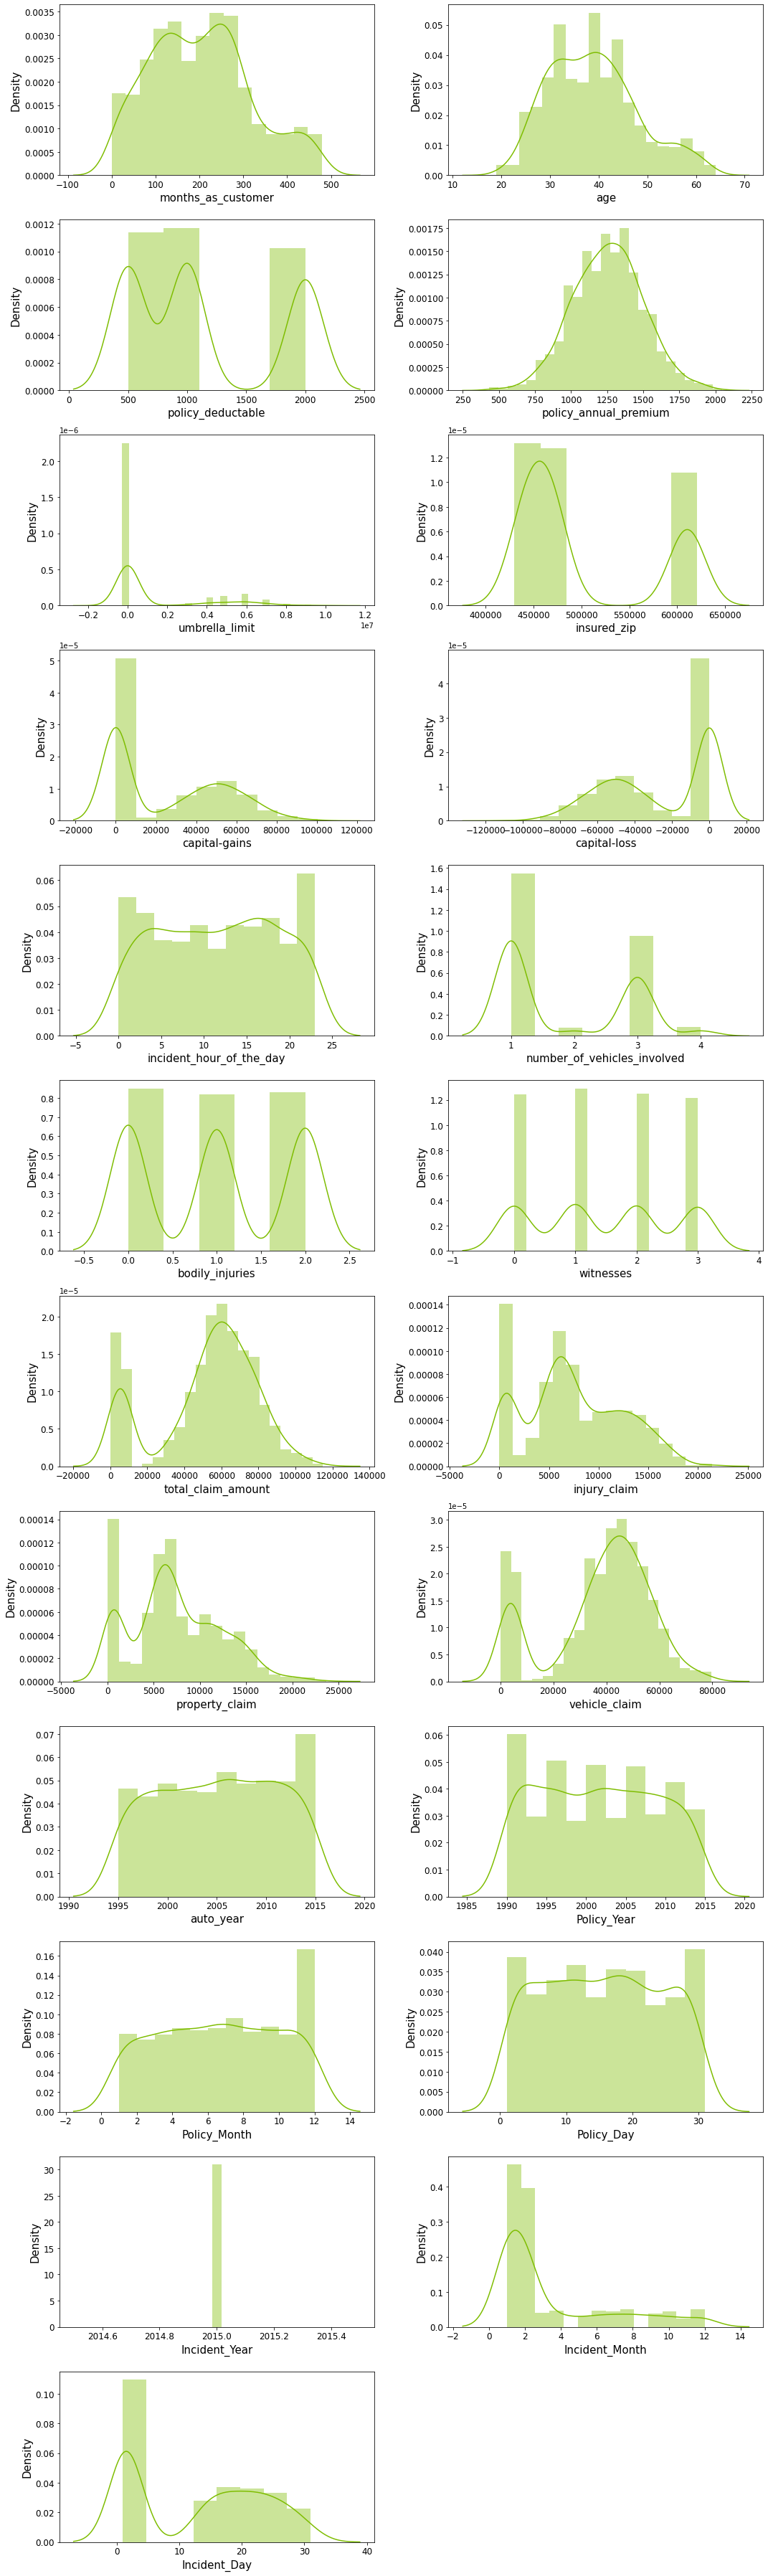

In [2196]:
# Checking the distribution of the numerical features using distplot

plt.figure(figsize=(15,50))
plot_num=1

for i in insurance_num:
    if plot_num<=23:
        sub=plt.subplot(12,2,plot_num)
        sns.distplot(insurance[i],color='#7ebd01')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Density',fontsize=15)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
    plot_num+=1
plt.tight_layout()

### Observations

Above distribution plot shows 

Umbrella limit, capital-gains, number of vehicles involved, incident month and incident day are skewed towards right

capital-loss, total claim amount, injury claim, vehicle claim are skewed towards left

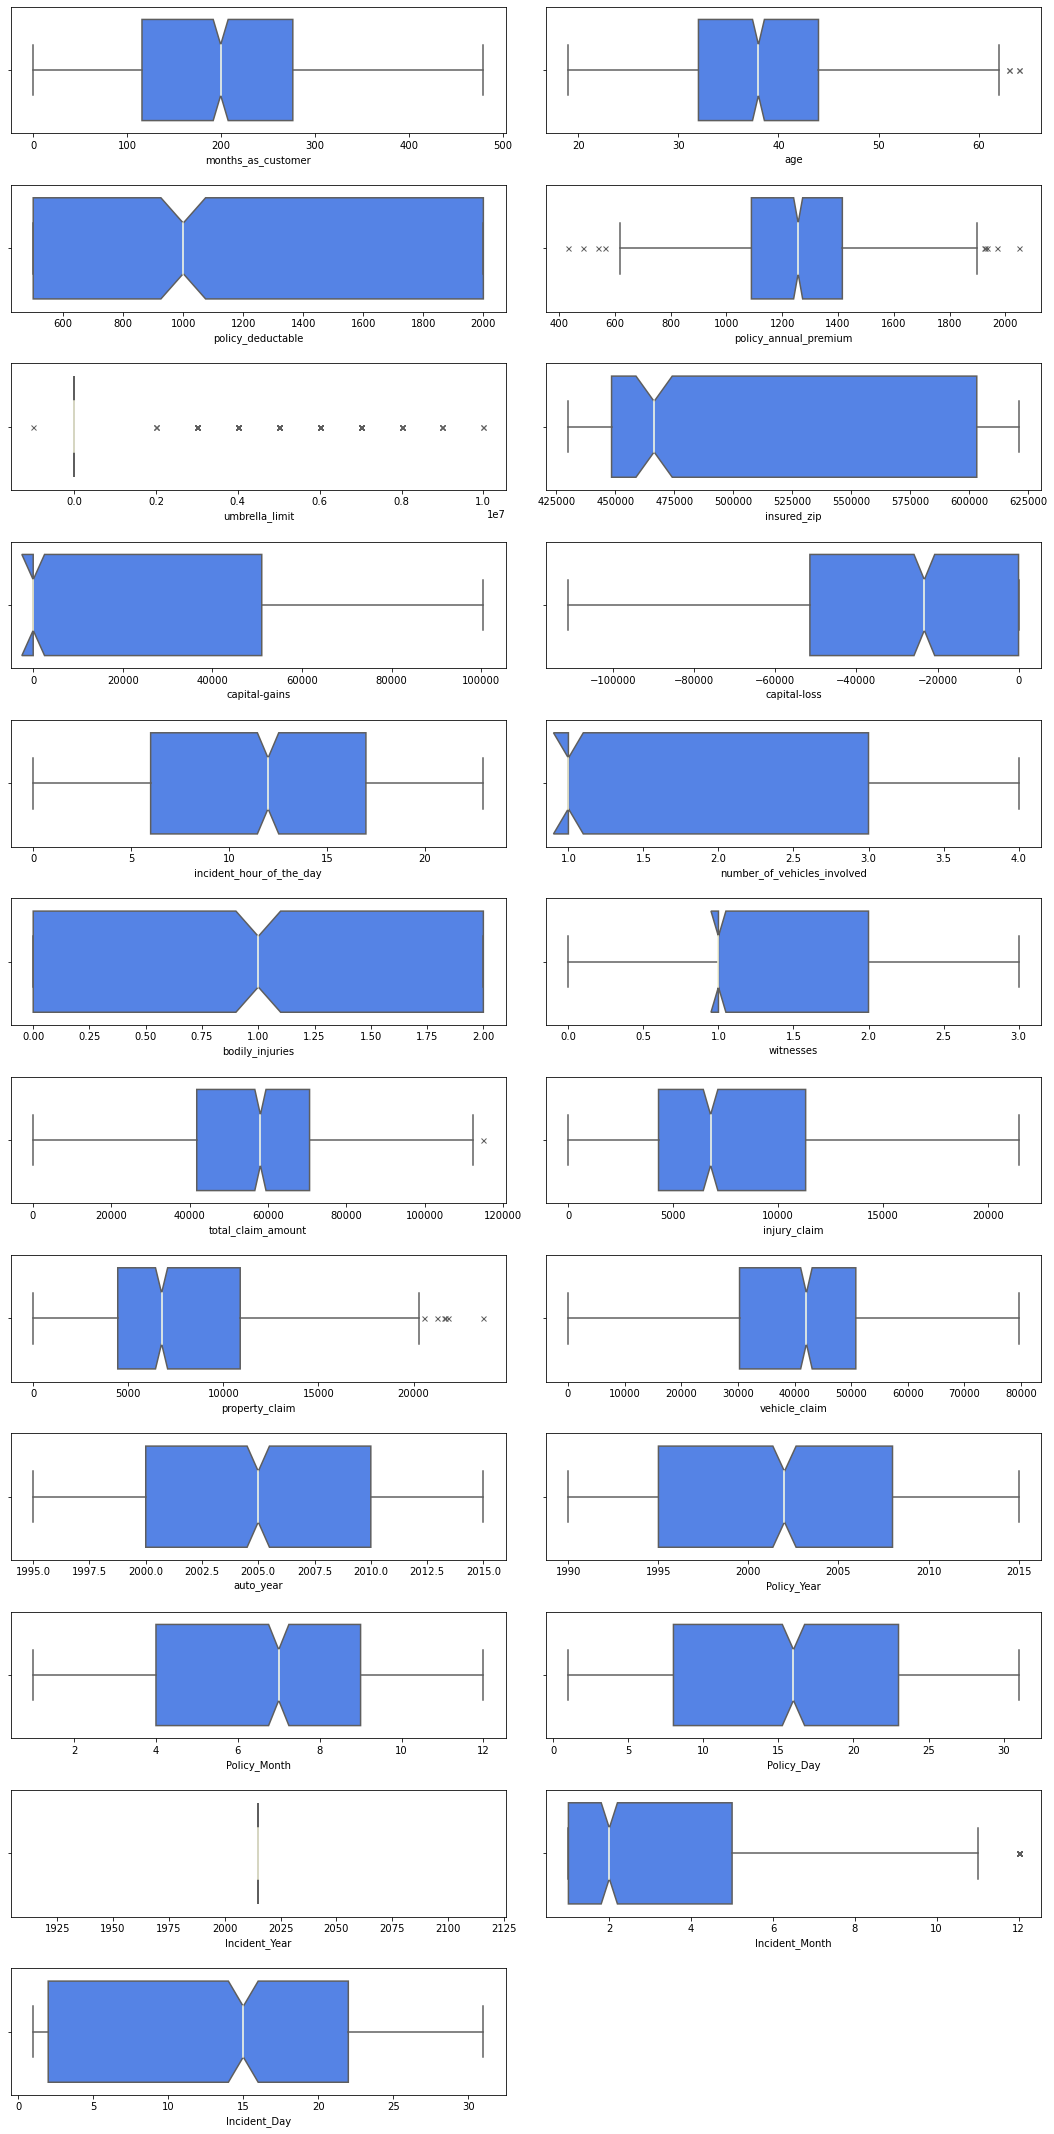

In [2197]:
# Visualizing the dataset with Boxplot to check outliers

plt.figure(figsize=(15,30))
st = 1
for i in insurance_num:
    if st <=23:
        sub = plt.subplot(12,2,st)
        sns.boxplot(insurance[i],color='#3d7afd',notch=True,
                    medianprops={"color": "#ffffe4"},flierprops={"marker": "x"})
        plt.xlabel(i,fontsize=10)
        plt.tight_layout(pad=2.0)
    st+=1
plt.show()

### Observations

Above boxplot shows Outliers are present in the features age, policy_deductable, policy_annual_premium, umbrella_limit, property_claim and incident month

## Bivariate and Multivariate Analysis

<Figure size 1080x2160 with 0 Axes>

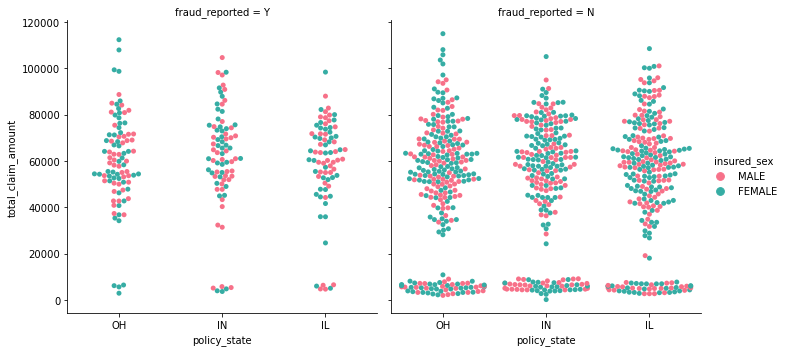

In [2198]:
# Visualizing policy_state Vs total_claim_amount Vs fraud_reported Vs insured_sex using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=insurance,x="policy_state", y="total_claim_amount", col="fraud_reported",
               hue="insured_sex",kind="swarm",palette='husl')

In [ ]:
### Observations

When we compare policy_state Vs total_claim_amount Vs fraud_reported Vs insured_sex

We can observe total_claim_amount were the fraud_reported as 'Yes' are between 30000 to 10000

Fraud reported(Yes) Total_claim_amount above 10000 are mostly Female  

In [2199]:
# Visualizing policy_csl Vs total_claim_amount Vs fraud_reported Vs insured_sex using catplot

plt.figure(figsize=(15,30))
cat=sns.catplot(data=insurance,x="policy_csl", y="total_claim_amount", col="fraud_reported",
               hue="insured_sex",kind="swarm",palette='husl')

<Figure size 1080x2160 with 0 Axes>

### Observations

Most of the fraud_reported as 'Yes' are in the policy_csl 250/500 and 100/300

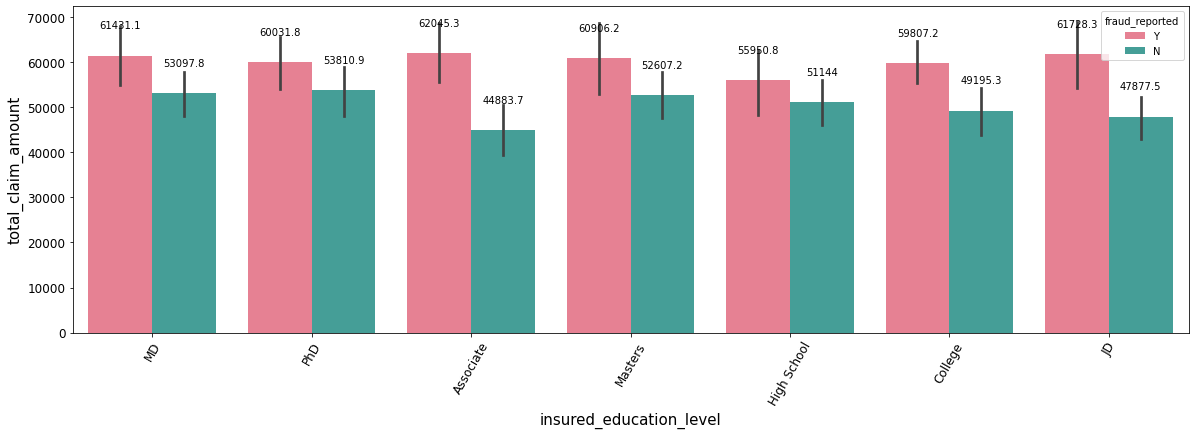

In [2200]:
# Visualizing insured_education_level vs total_claim_amount vs fraud_reported by barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="insured_education_level", y="total_claim_amount", hue="fraud_reported",palette='husl')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('insured_education_level',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25)
plt.show()

### Observations

When we compare insured_education_level vs total_claim_amount vs fraud_reported by barplot

Total_claim_amount were fraud_reported as 'Yes' are high with insured education level as Associate, JD, MD and Masters 

In [2201]:
# Visualizing insured_occupation vs total_claim_amount vs fraud_reported by barplot


plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="insured_occupation", y="total_claim_amount", hue="fraud_reported",palette='rocket')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('insured_occupation',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25)
plt.show()

### Observations

Aggregated Total_claim_amount were fraud_reported as 'Yes' are high with the insured whose occupation are in
protective-serv, transport moving, tech-support and prof-specialty

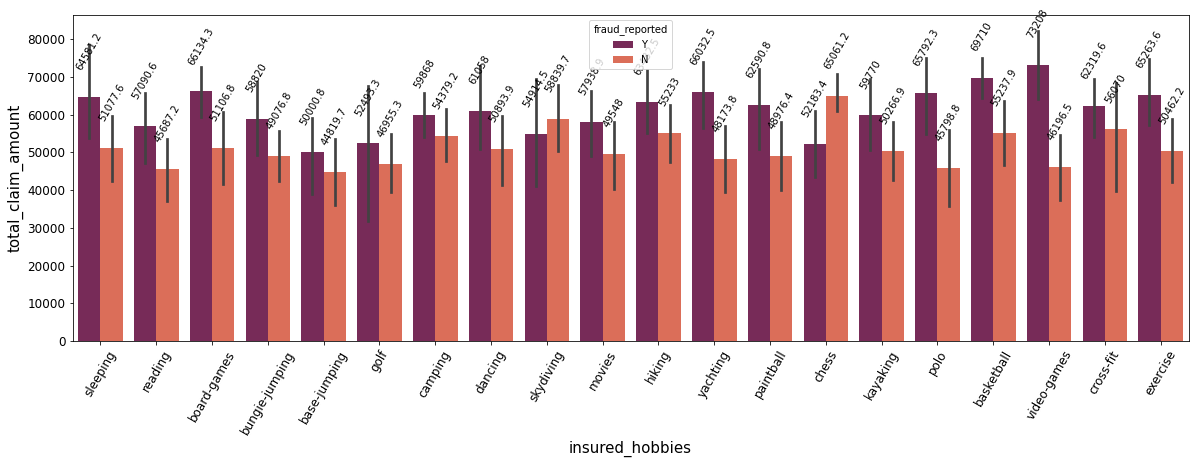

In [2202]:
# Visualizing insured_hobbies vs total_claim_amount vs fraud_reported by barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="insured_hobbies", y="total_claim_amount", hue="fraud_reported",palette='rocket')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('insured_hobbies',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25,rotation=60)
plt.show()

### Observations

Video games, basket ball, board-games and yachting are the hobbies of the insured were the average total_claim_amount is high
and fraud_reported as 'Yes'

In [2203]:
# Visualizing insured_relationship vs total_claim_amount vs fraud_reported by barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="insured_relationship", y="total_claim_amount", hue="fraud_reported",palette='viridis')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('insured_relationship',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25)
plt.show()

### Observations

Unmarried,husband,other-relative and own-child are the relationship of the insured were the average total_claim_amount is high and fraud_reported as 'Yes'

In [2204]:
# Visualizing incident_type Vs total_claim_amount Vs fraud_reported Vs insured_sex using catplot

plt.figure(figsize=(15,50))
cat=sns.catplot(data=insurance,x="incident_type", y="total_claim_amount", col="fraud_reported",
               hue="insured_sex",kind="swarm",palette='hls')
cat.set_xticklabels(rotation=90)
plt.show()

<Figure size 1080x3600 with 0 Axes>

### Observations

Single-Vehicle Collision and Multi Vehicle Collision are high in incident type were fraud_reported as 'Yes' and 
total claim amount ranges between 40000 to 10000

In both Single and Multi Vehicle Collision Female count is high

In Vehicle theft Male count is high were fraud_reported as 'Yes' and for Parked car it's Female

In Vehicle theft and Parked car, total_claim_amount for fraud_reported as 'Yes' ranges between 100 to 10000 

In [2205]:
# Visualizing collision_type Vs total_claim_amount Vs fraud_reported Vs insured_sex using catplot

plt.figure(figsize=(15,50))
cat=sns.catplot(data=insurance,x="collision_type", y="total_claim_amount", col="fraud_reported",
               hue="insured_sex",kind="swarm",palette='hls')
cat.set_xticklabels(rotation=90)
plt.show()

<Figure size 1080x3600 with 0 Axes>

### Observations

fraud_reported as 'Yes' in Rear Collision and Side Collision are high

Collision type which are unknown are mostly below 10000

<Figure size 1080x3600 with 0 Axes>

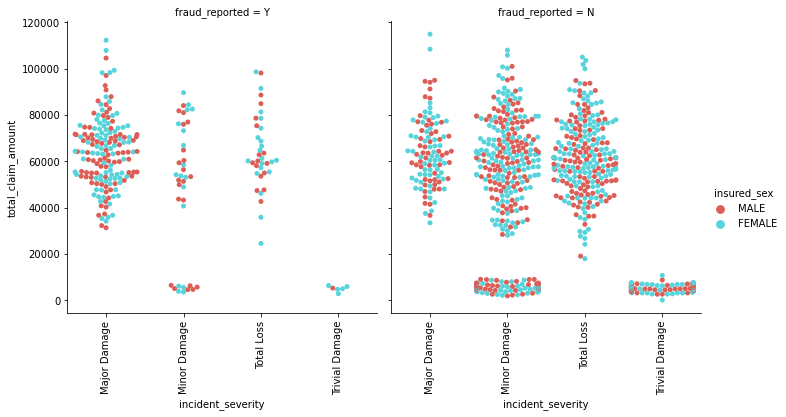

In [2206]:
# Visualizing incident_severity Vs total_claim_amount Vs fraud_reported Vs insured_sex using catplot

plt.figure(figsize=(15,50))
cat=sns.catplot(data=insurance,x="incident_severity", y="total_claim_amount", col="fraud_reported",
               hue="insured_sex",kind="swarm",palette='hls')
cat.set_xticklabels(rotation=90)
plt.show()

### Observations

Based on incident_severity, most of the fraud reported as 'Yes' are from Major Damage and Female count is higher than Male

Overall count of Minor Damage and Total loss are high but fraud reported as 'Yes' is less

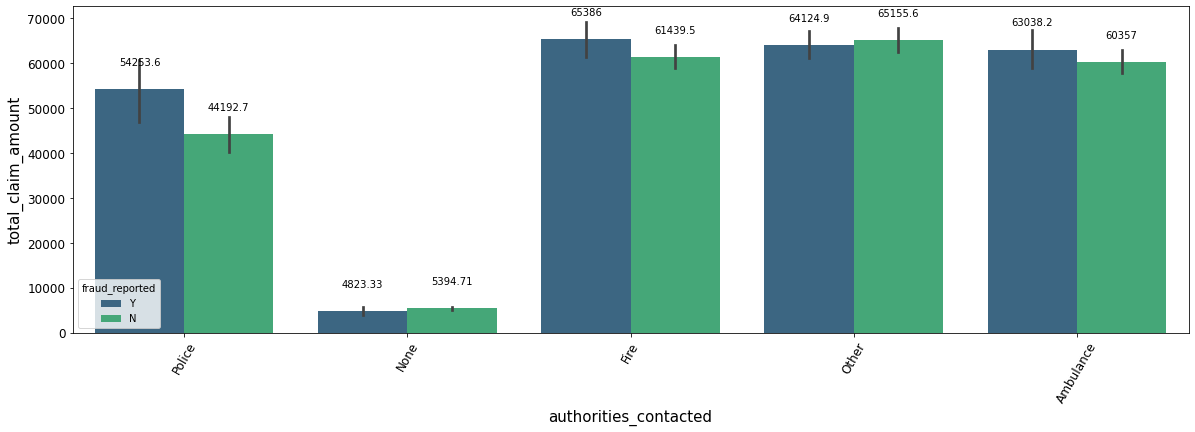

In [2207]:
# Visualizing authorities_contacted Vs total_claim_amount Vs fraud_reported using barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="authorities_contacted", y="total_claim_amount", hue="fraud_reported",palette='viridis')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('authorities_contacted',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=22)
plt.show()

### Observations

Among authorities contacted, aggregated Total_claim_amount of fraud_reported as 'Yes' are high in 'Fire', 'Other' and 
'Ambulance'.

Authorities contacted by 'Police' and 'None' is less when compared with other categories


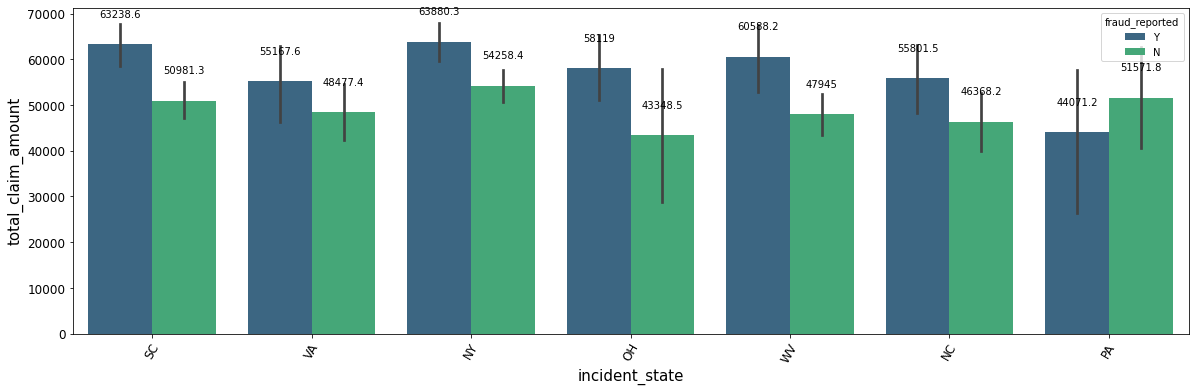

In [2208]:
# Visualizing incident_state Vs total_claim_amount Vs fraud_reported using barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="incident_state", y="total_claim_amount", hue="fraud_reported",palette='viridis')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('incident_state',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25)
plt.show()

### Observations

Based on the incident_state, maximum fraud reported as 'Yes' are in NY, SC and WV based on the total claim amount

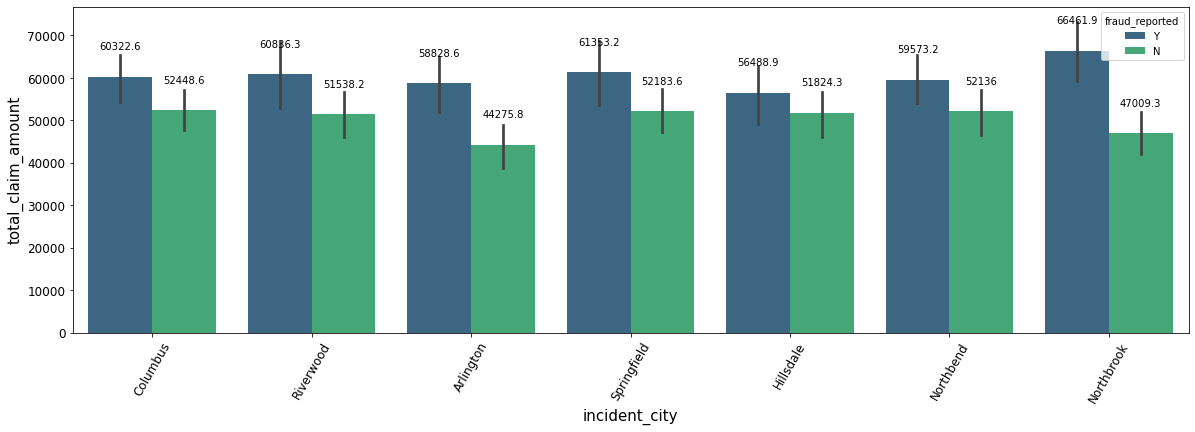

In [2209]:
# Visualizing incident_city Vs total_claim_amount Vs fraud_reported using barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="incident_city", y="total_claim_amount", hue="fraud_reported",palette='viridis')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('incident_city',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25)
plt.show()

### Observations

Based on the incident_city, maximum fraud reported as 'Yes' are in Northbrook, Springfield, Riverwood 
and Columbus based on the total claim amount

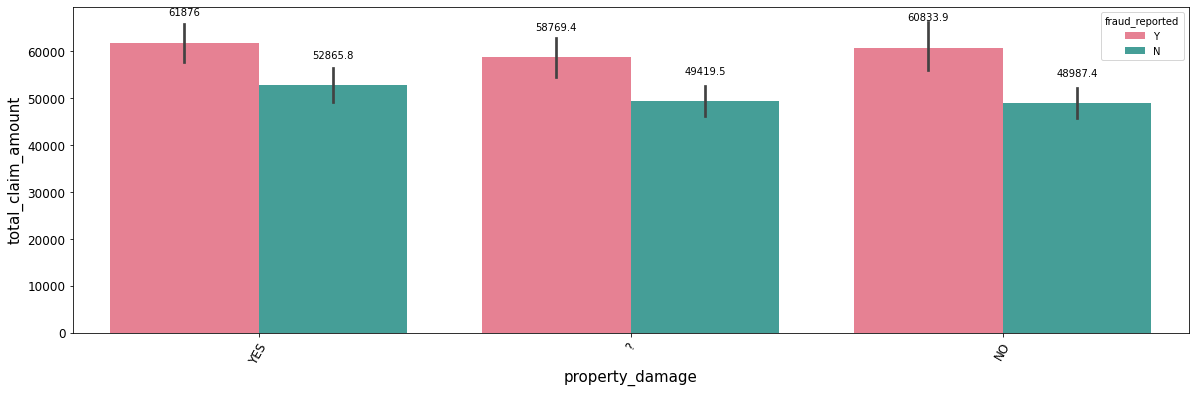

In [2210]:
# Visualizing property_damage Vs total_claim_amount Vs fraud_reported using barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="property_damage", y="total_claim_amount", hue="fraud_reported",palette='husl')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('property_damage',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25)
plt.show()

### Observations

Based on aggregated Total claim amount, Fraud_reported as 'Yes' are high in Property_damage 'Yes'

Property Damage unknown are also almost close to Property_damage 'Yes', in fraud reported

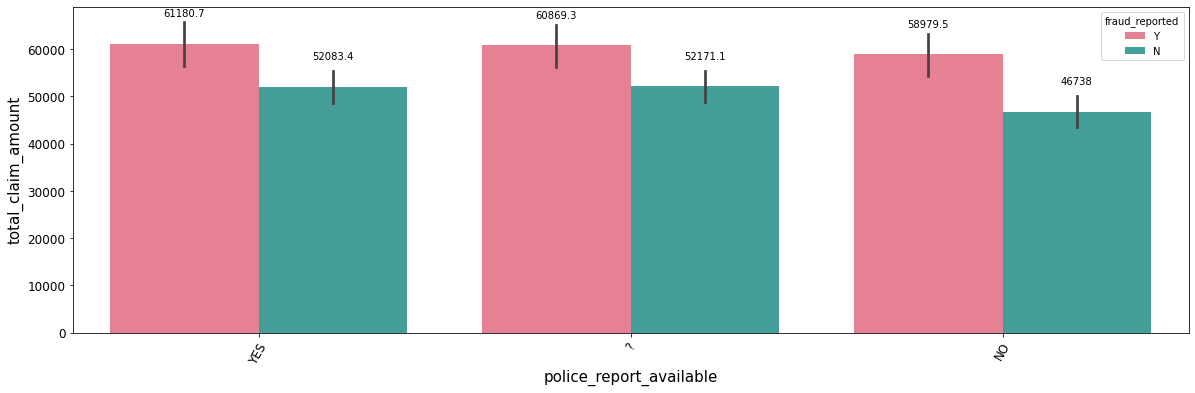

In [2211]:
# Visualizing police_report_available Vs total_claim_amount Vs fraud_reported using barplot


plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="police_report_available", y="total_claim_amount", hue="fraud_reported",palette='husl')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('police_report_available',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25)
plt.show()

### Observations

Police_report_available 'Yes' and 'Unknown' are high based on the aggregated total claim amount for fraud reported 'Yes'

In [2212]:
# Visualizing auto_make Vs total_claim_amount Vs fraud_reported using barplot


plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="auto_make", y="total_claim_amount", hue="fraud_reported",palette='husl')
plt.xticks(fontsize=12,rotation=60)
plt.yticks(fontsize=12)
plt.xlabel('auto_make',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25)
plt.show()

### Observations

Dodge, Ford, Suburu, Jeep, Toyota, Chevrolet, BMW, Nissan and Saab are the auto_make of the vehicle, were fraud claim amount reported high

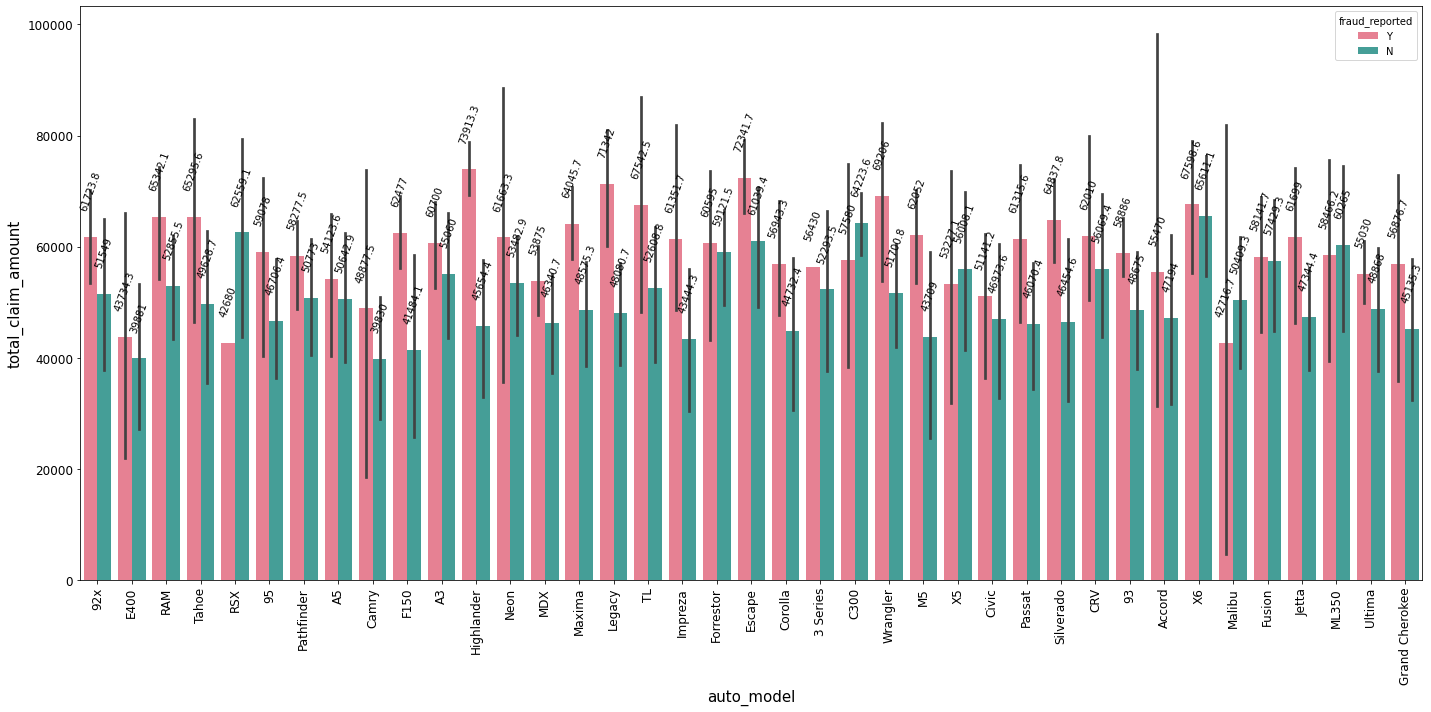

In [2213]:
# Visualizing auto_model Vs total_claim_amount Vs fraud_reported using barplot

plt.figure(figsize=(20,10))
bc=sns.barplot(data=insurance, x="auto_model", y="total_claim_amount", hue="fraud_reported",palette='husl')
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.xlabel('auto_model',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=10,padding=25,rotation=70)

plt.tight_layout()

### Observations

Highlander, Escape and Legacy are the top 3 auto_model of the vehicle, were fraud claim amount reported high

In [2214]:
# Visualizing bodily_injuries Vs total_claim_amount Vs fraud_reported using barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="bodily_injuries", y="total_claim_amount", hue="fraud_reported",palette='viridis')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('bodily_injuries',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=12,padding=25)

plt.tight_layout()

### Observations

Bodily_injuries with 2 and 1 are high were fraud claim amount reported as 'Yes'

In [2215]:
# Visualizing witnesses Vs total_claim_amount Vs fraud_reported using barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="witnesses", y="total_claim_amount", hue="fraud_reported",palette='viridis')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('witnesses',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=12,padding=25)

plt.tight_layout()

### Observations

Fraud aggregated total claim amount reported high are with witnesses count 3 and 1 

In [2216]:
# Visualizing Incident_Year Vs total_claim_amount Vs fraud_reported using barplot

plt.figure(figsize=(20,6))
bc=sns.barplot(data=insurance, x="Incident_Year", y="total_claim_amount", hue="fraud_reported",palette='viridis')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Incident_Year',fontsize=15)
plt.ylabel('total_claim_amount',fontsize=15)
for j in bc.containers:
        bc.bar_label(j,fontsize=12,padding=15)

plt.tight_layout()

### Observations

Incident year which has been documented in the dataset is 2015 and aggregated total fraud claim amount is high 

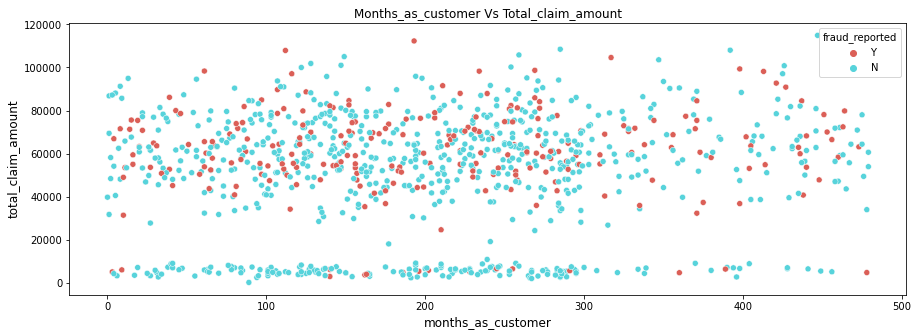

In [2217]:
# Comparing months_as_customer with total_claim_amount by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=insurance, x="months_as_customer", y="total_claim_amount",hue='fraud_reported',palette='hls')
plt.xlabel('months_as_customer',fontsize=12)
plt.ylabel('total_claim_amount',fontsize=12)
plt.title('Months_as_customer Vs Total_claim_amount',fontsize=12)
plt.show()

### Observations

Most of the customers reported for fraud claim amount are between 0 to 300 months and their total claim amount ranges
between 40000 to 10000

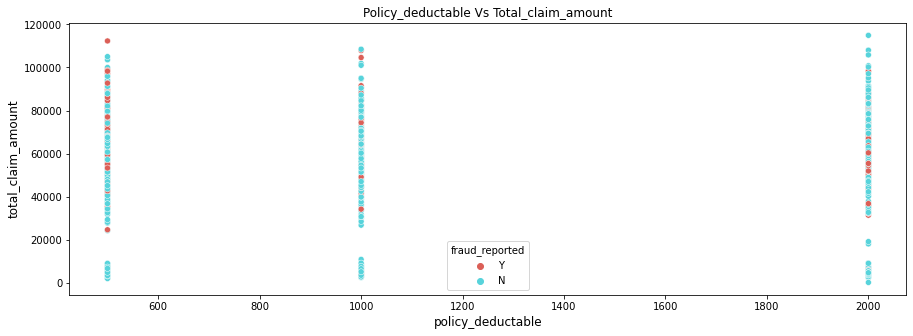

In [2218]:
# Comparing policy_deductable with total_claim_amount by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=insurance, x="policy_deductable", y="total_claim_amount",hue='fraud_reported',palette='hls')
plt.xlabel('policy_deductable',fontsize=12)
plt.ylabel('total_claim_amount',fontsize=12)
plt.title('Policy_deductable Vs Total_claim_amount',fontsize=12)
plt.show()

### Observations

Most of the fraud reported as 'Yes' are with customer’s whose policy_deductable amount is 500 and the claim amount ranges 
mostly above 50000

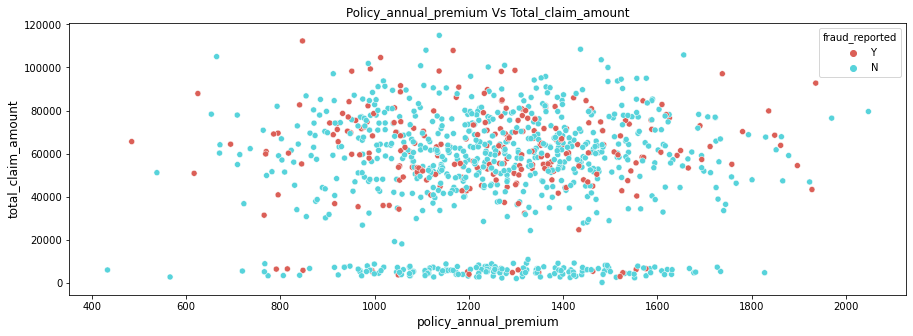

In [2219]:
# Comparing policy_annual_premium with total_claim_amount by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=insurance, x="policy_annual_premium", y="total_claim_amount",hue='fraud_reported',palette='hls')
plt.xlabel('policy_annual_premium',fontsize=12)
plt.ylabel('total_claim_amount',fontsize=12)
plt.title('Policy_annual_premium Vs Total_claim_amount',fontsize=12)
plt.show()

### Observations

Most of the fraud reported as 'Yes' are with customer’s whose policy_annual_premium amount is between 1000 to 1600

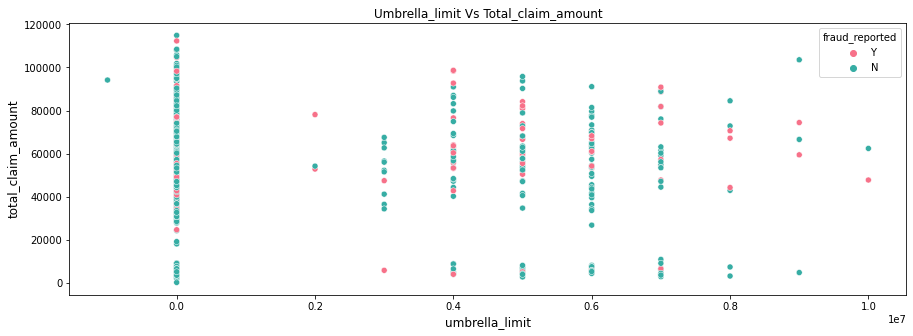

In [2220]:
# Comparing umbrella_limit with total_claim_amount by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=insurance, x="umbrella_limit", y="total_claim_amount",hue='fraud_reported',palette='husl')
plt.xlabel('umbrella_limit',fontsize=12)
plt.ylabel('total_claim_amount',fontsize=12)
plt.title('Umbrella_limit Vs Total_claim_amount',fontsize=12)
plt.show()

### Observations

Most of the fraud reported as 'Yes' are with Customer’s with umbrella_limit between 3000000 to 8000000

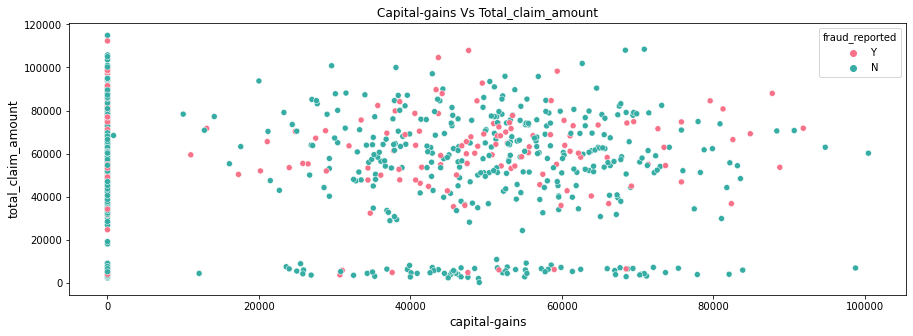

In [2221]:
# Comparing capital-gains with total_claim_amount by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=insurance, x="capital-gains", y="total_claim_amount",hue='fraud_reported',palette='husl')
plt.xlabel('capital-gains',fontsize=12)
plt.ylabel('total_claim_amount',fontsize=12)
plt.title('Capital-gains Vs Total_claim_amount',fontsize=12)
plt.show()

### Observations

Most of the fraud reported as 'Yes' are with Customer's with capital gains between 30000 to 70000  

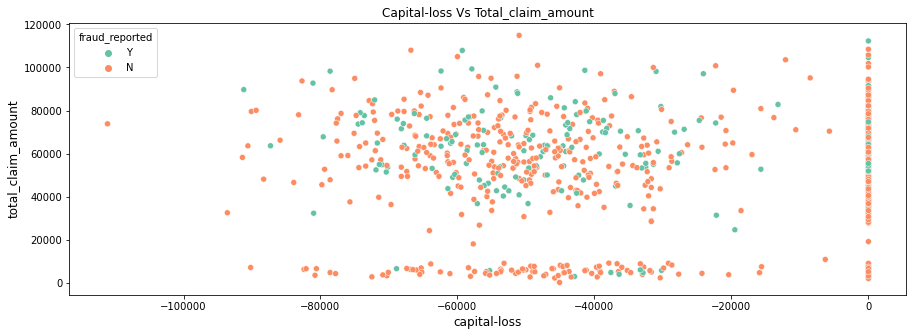

In [2222]:
# Comparing capital-loss with total_claim_amount by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=insurance, x="capital-loss", y="total_claim_amount",hue='fraud_reported',palette='Set2')
plt.xlabel('capital-loss',fontsize=12)
plt.ylabel('total_claim_amount',fontsize=12)
plt.title('Capital-loss Vs Total_claim_amount',fontsize=12)
plt.show()

### Observations

Most of the fraud reported as 'Yes' are with Customer's with capital loss between -30000 to -70000

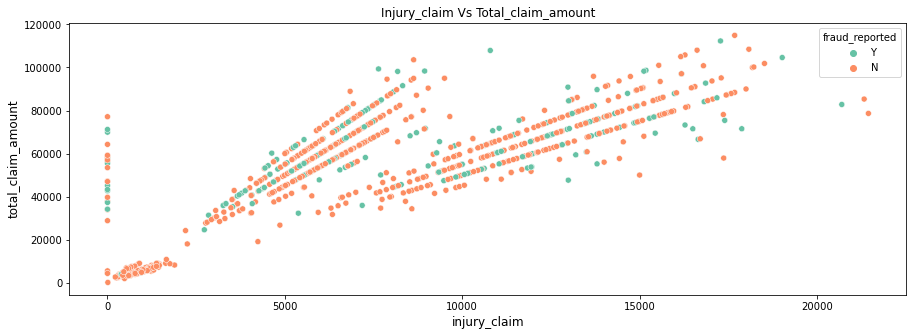

In [2223]:
# Comparing injury_claim with total_claim_amount by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=insurance, x="injury_claim", y="total_claim_amount",hue='fraud_reported',palette='Set2')
plt.xlabel('injury_claim',fontsize=12)
plt.ylabel('total_claim_amount',fontsize=12)
plt.title('Injury_claim Vs Total_claim_amount',fontsize=12)
plt.show()

### Observations

Customer's who claimed for injury_claim and reported as fraud are mostly claiming amount(injury_claim amount)
between 3000 to 15000  

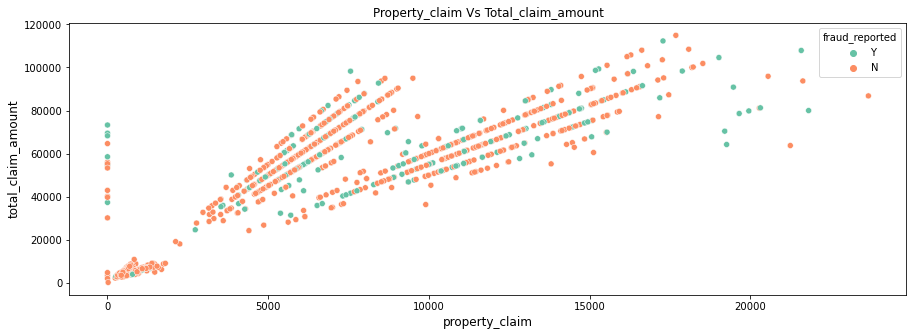

In [2224]:
# Comparing property_claim with total_claim_amount by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=insurance, x="property_claim", y="total_claim_amount",hue='fraud_reported',palette='Set2')
plt.xlabel('property_claim',fontsize=12)
plt.ylabel('total_claim_amount',fontsize=12)
plt.title('Property_claim Vs Total_claim_amount',fontsize=12)
plt.show()

### Observations

Customer's who claimed for property_claim and reported as fraud are mostly claiming amount(property_claim amount)
between 3000 to 20000  

In [2225]:
# Comparing vehicle_claim with total_claim_amount by scatterplot

plt.figure(figsize=(15,5))
sns.scatterplot(data=insurance, x="vehicle_claim", y="total_claim_amount",hue='fraud_reported',palette='Set2')
plt.xlabel('vehicle_claim',fontsize=12)
plt.ylabel('total_claim_amount',fontsize=12)
plt.title('Vehicle_claim Vs Total_claim_amount',fontsize=12)
plt.show()

### Observations

Customer's who claimed for vehicle_claim and reported as fraud are mostly claiming amount(vehicle_claim amount)
between 30000 to 80000  

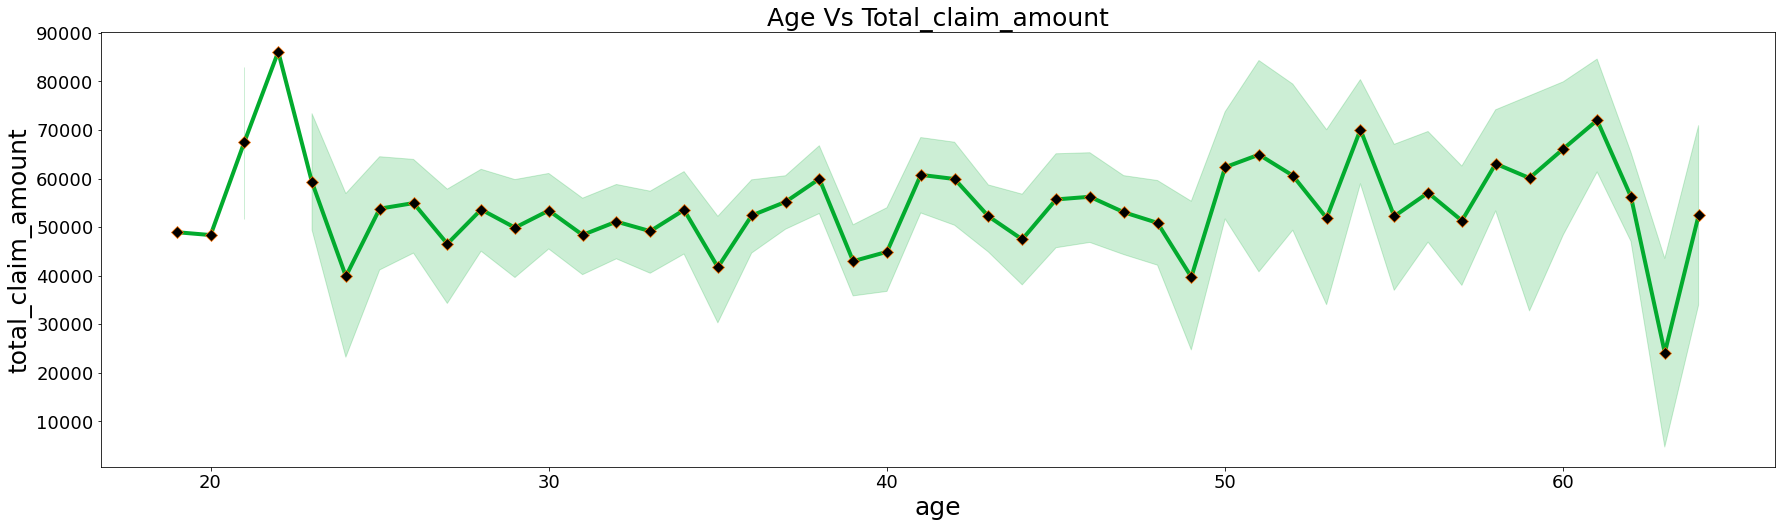

In [2226]:
# Comparing age Vs total_claim_amount by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =insurance,x='age',y='total_claim_amount',color="#02ab2e",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('age',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('total_claim_amount',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Age Vs Total_claim_amount',fontsize=25)
plt.show()

### Observations

Customer's who are in the age group of early 20's and 36 to 65 are maximum who are claiming for high claim amount

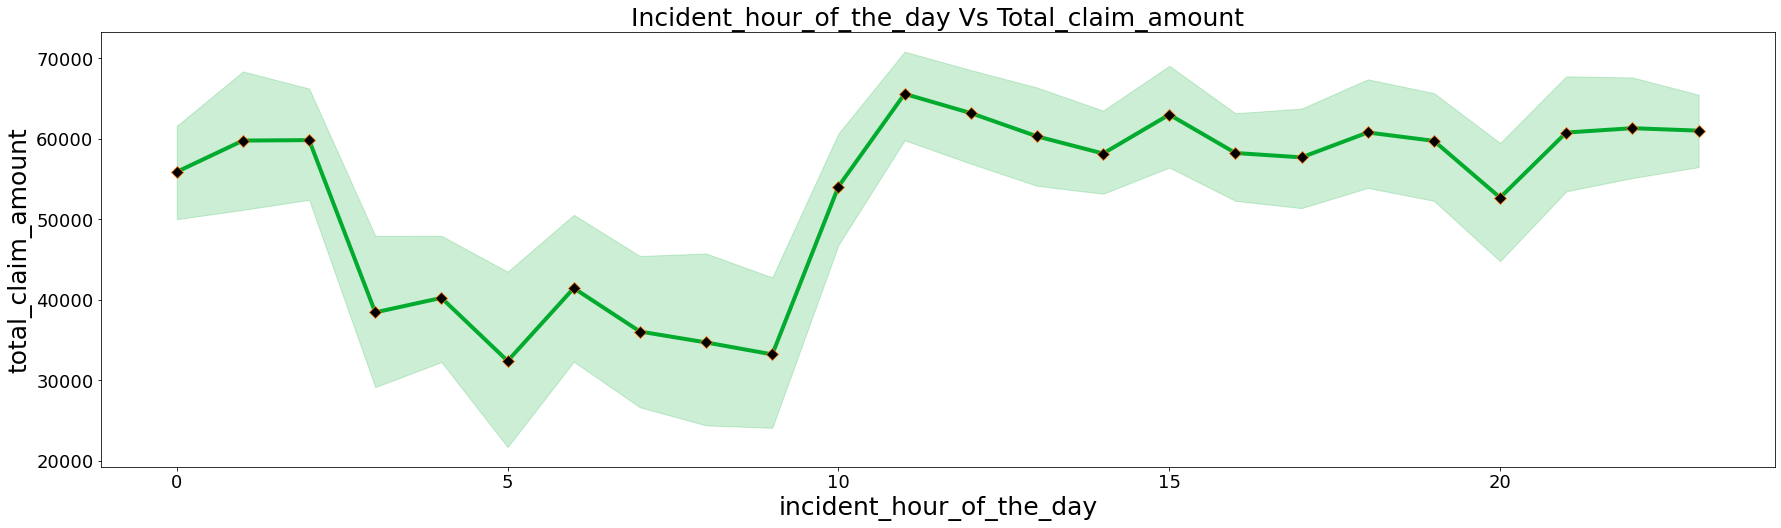

In [2227]:
# Comparing incident_hour_of_the_day Vs total_claim_amount by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =insurance,x='incident_hour_of_the_day',y='total_claim_amount',color="#02ab2e",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('incident_hour_of_the_day',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('total_claim_amount',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Incident_hour_of_the_day Vs Total_claim_amount',fontsize=25)
plt.show()

### Observations

When comparing Incident_hour_of_the_day Vs Total_claim_amount

Total claim amounts are high for Incidents occured during 10 to 23 hours and 0 to 3 hours of the day 

In [2228]:
# Comparing number_of_vehicles_involved Vs total_claim_amount by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =insurance,x='number_of_vehicles_involved',y='total_claim_amount',color="#0485d1",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('number_of_vehicles_involved',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('total_claim_amount',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Number_of_vehicles_involved Vs Total_claim_amount',fontsize=25)
plt.show()

### Observations

Customer's claiming amount is high when number of vehicles involved is more than 1

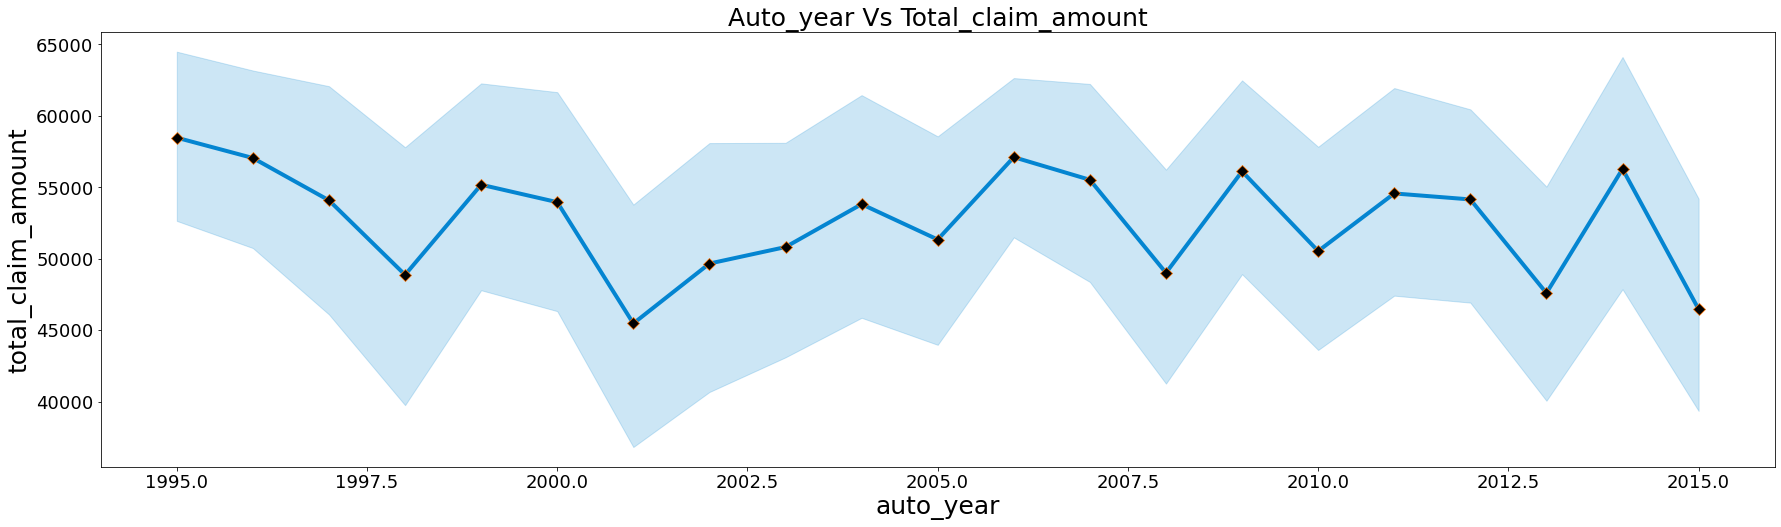

In [2229]:
# Comparing auto_year Vs total_claim_amount by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =insurance,x='auto_year',y='total_claim_amount',color="#0485d1",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('auto_year',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('total_claim_amount',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Auto_year Vs Total_claim_amount',fontsize=25)
plt.show()

### Observations

Customer's claiming amount are high for the vehicle manufactured in the year 1995 to 1997,1999 to 2000,
2004 to 2007, 2009 to 2012 and 2014

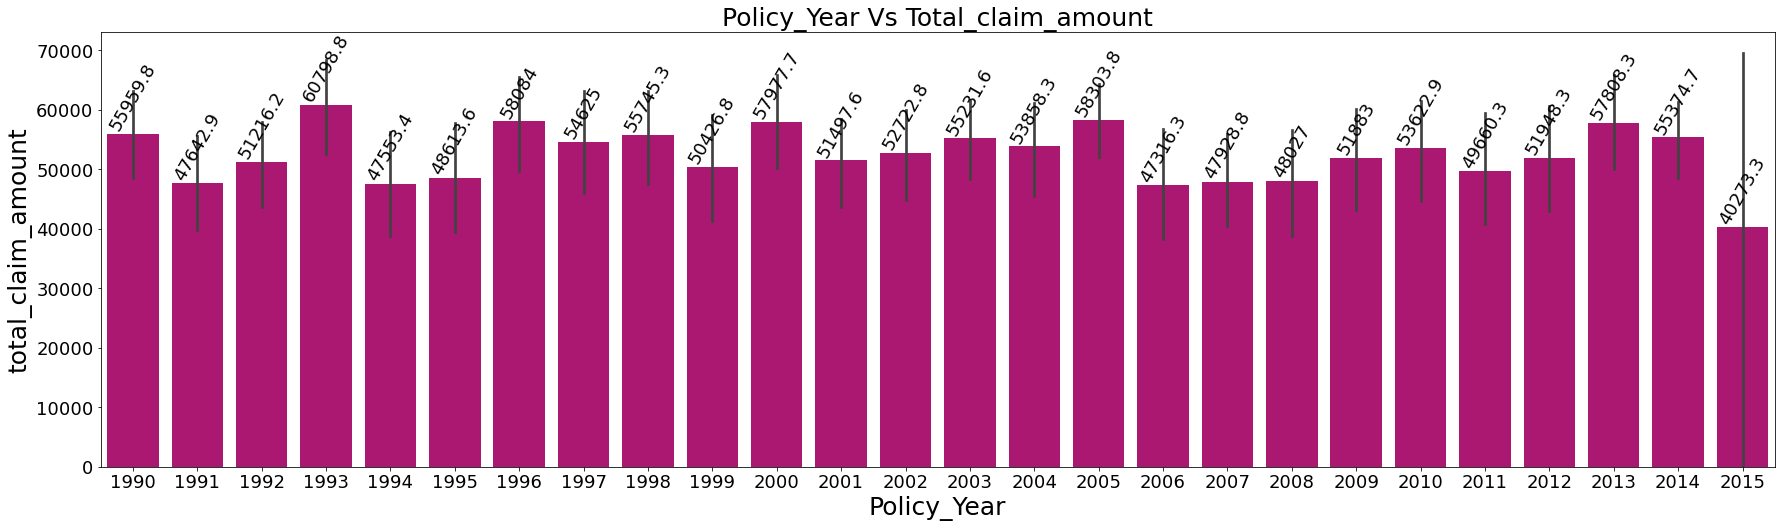

In [2230]:
# Comparing Policy_Year Vs total_claim_amount by Lineplot

plt.figure(figsize=(30,8))
wr = sns.barplot(data =insurance,x='Policy_Year',y='total_claim_amount',color="#c20078")
plt.xlabel('Policy_Year',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('total_claim_amount',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Policy_Year Vs Total_claim_amount',fontsize=25)
for i in wr.containers:
    wr.bar_label(i,fontsize=18, rotation=60)
plt.show()

### Observations

Customer's claiming amount are high who took policy in the year 1993, 2005, 1996, 2013, 2000, 1990, 1998, 2014 and 2003   

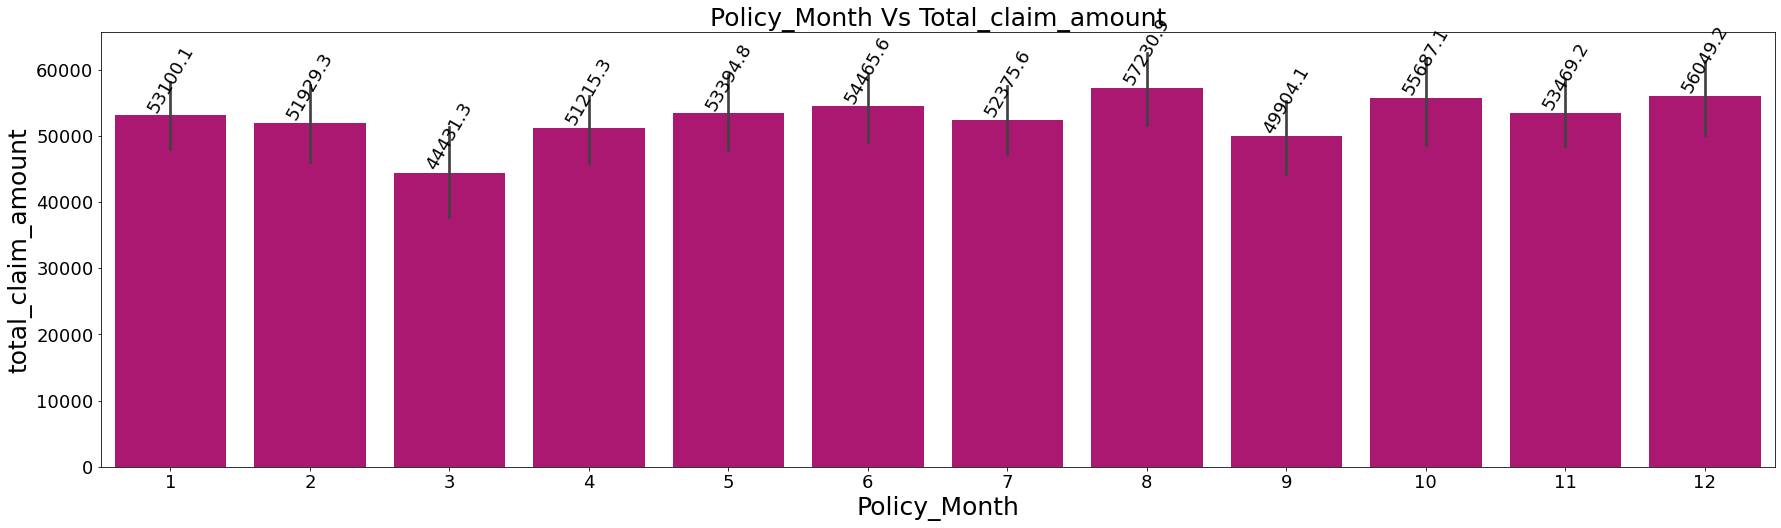

In [2231]:
# Comparing Policy_Month Vs total_claim_amount by Lineplot

plt.figure(figsize=(30,8))
wr = sns.barplot(data =insurance,x='Policy_Month',y='total_claim_amount',color="#c20078")
plt.xlabel('Policy_Month',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('total_claim_amount',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Policy_Month Vs Total_claim_amount',fontsize=25)
for i in wr.containers:
    wr.bar_label(i,fontsize=18, rotation=60)
plt.show()

### Observations

If we look into policy_month, Customer's claiming amount are high throughout the year and maximum total amount reaches in 
the month of August and December

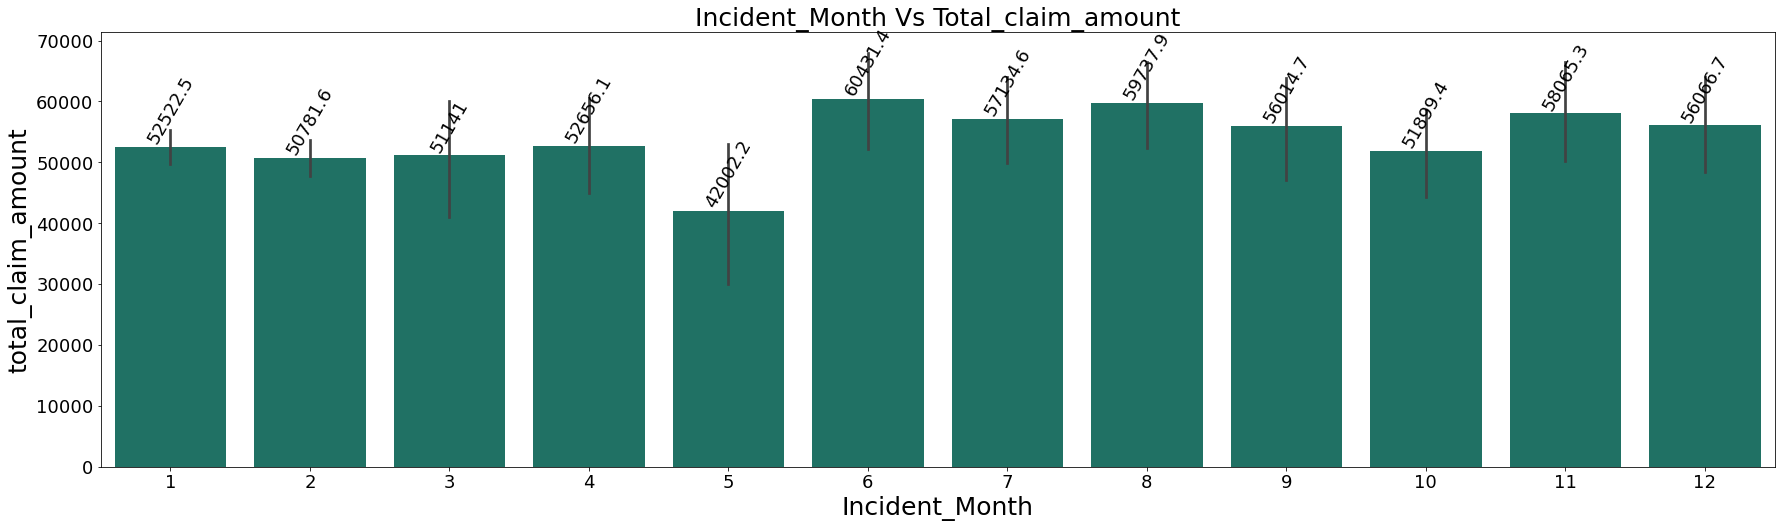

In [2232]:
# Comparing Incident_Month Vs total_claim_amount by Lineplot

plt.figure(figsize=(30,8))
wr = sns.barplot(data =insurance,x='Incident_Month',y='total_claim_amount',color="#137e6d")
plt.xlabel('Incident_Month',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('total_claim_amount',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Incident_Month Vs Total_claim_amount',fontsize=25)
for i in wr.containers:
    wr.bar_label(i,fontsize=18, rotation=60)
plt.show()

### Observations

Based on incident_month, Customer's claiming amount are more than 50000+ throughout the year and maximum total amount 
reaches in the month of June, August and November

## Data Feature Selection and Engineering

### Replacing unknown values in features 'collision_type','property_damage' and 'police_report_available'

In [2233]:
# Replacing unknown values in features 'collision_type','property_damage' and 'police_report_available'

insurance['collision_type'] =insurance.collision_type.str.replace('?','Rear Collision')
insurance['property_damage'] =insurance.property_damage.str.replace('?','NO')
insurance['police_report_available'] =insurance.police_report_available.str.replace('?','NO')

In [2234]:
insurance['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [2235]:
insurance['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [2236]:
insurance['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

### Observations

Replaced unknown values in the features 'collision_type','property_damage' and 'police_report_available' by the most frequent value in the respective features


## Label Encoding

In [2237]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in insurance.columns:
    if (insurance[i].dtypes == 'object'):
        insurance[i] = le.fit_transform(insurance[i].values)

In [2238]:
insurance.sample(5)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
649                  16   32             0           0               1000   
209                 404   53             1           1                500   
479                 317   46             1           1               1000   
164                 122   34             0           1                500   
481                  20   21             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
649                 968.46               0       615767            1   
209                 767.14               0       466201            1   
479                1012.78               0       469126            1   
164                1495.06               0       452249            0   
481                1390.29               0       479408            0   

     insured_education_level  ...  auto_make  auto_model  auto_year  \
649                        4  ...          4          30       1995   
209                        0  ...         11          21       2002   
479                        4  ...          8          24       1999   
164                        5  ...          8          12       2011   
481                        5  ...          0          23       2006   

     fraud_reported  Policy_Year  Policy_Month  Policy_Day  Incident_Year  \
649               1         2002             7          28           2015   
209               0         2014            10          12           2015   
479               1         1999             7          22           2015   
164               0         2003             9           8           2015   
481               0         2005             1          30           2015   

     Incident_Month  Incident_Day  
649               1            27  
209               1            14  
479               1            26  
164               7             1  
481               1            14  

[5 rows x 41 columns]

### Observations

Encoded categorical columns to numerical with Label Encoder 

## Describe - Statistical Summary

In [2239]:
insurance.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_state                 1000.0  1.014000e+00  8.309600e-01        0.00   
policy_csl                   1000.0  9.510000e-01  8.045162e-01        0.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
insured_sex                  1000.0  4.630000e-01  4.988786e-01        0.00   
insured_education_level      1000.0  2.966000e+00  1.948497e+00        0.00   
insured_occupation           1000.0  6.653000e+00  4.019048e+00        0.00   
insured_hobbies              1000.0  9.731000e+00  5.674049e+00        0.00   
insured_relationship         1000.0  2.416000e+00  1.681003e+00        0.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_type                1000.0  1.172000e+00  1.081474e+00        0.00   
collision_type               1000.0  1.022000e+00  7.280426e-01        0.00   
incident_severity            1000.0  1.184000e+00  9.396952e-01        0.00   
authorities_contacted        1000.0  2.167000e+00  1.532142e+00        0.00   
incident_state               1000.0  3.242000e+00  2.155942e+00        0.00   
incident_city                1000.0  2.966000e+00  2.044266e+00        0.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
property_damage              1000.0  3.020000e-01  4.593550e-01        0.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
police_report_available      1000.0  3.140000e-01  4.643486e-01        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_make                    1000.0  6.546000e+00  4.034869e+00        0.00   
auto_model                   1000.0  1.931800e+01  1.113611e+01        0.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
fraud_reported               1000.0  2.470000e-01  4.314825e-01        0.00   
Policy_Year                  1000.0  2.001604e+03  7.360391e+00     1990.00   
Policy_Month                 1000.0  6.559000e+00  3.391758e+00        1.00   
Policy_Day                   1000.0  1.544800e+01  8.850176e+00        1.00   
Incident_Year                1000.0  2.015000e+03  0.000000e+00     2015.00   
Incident_Month               1000.0  3.407000e+00  3.276291e+00        1.00   
Incident_Day                 1000.0  1.308400e+01  1.044318e+01        1.00   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_state                      0.0000       1.0       2.000         2.00  
policy_csl                        0.0000       1.0       2.000         2.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
insured_s

In [2240]:
# Dropping the feature umbrella_limit

insurance.drop(['umbrella_limit'],axis=1,inplace=True)

In [2241]:
# Checking the dimension of the dataset

insurance.shape

(1000, 40)

### Observations

Count is same across all the columns

We can observe presence of outliers as the difference between 75% to Max are high in below features
months_as_customer,  age, policy_annual_premium , umbrella_limit, capital-gains, incident_hour_of_the_day, total_claim_amount,
injury_claim, property_claim, vehicle_claim, Incident_Month,Policy_Day and Incident_Day 

Dropping column umbrella_limit, as the negative value in the data affects the feature and 25%, 50% and 75% is 0
Moreover the difference between 75% to Max is huge, hence dropped the column for better Model prediction

## Correlation Analysis

In [2242]:
# Checking Correlation of the dataset with Heatmap

plt.figure(figsize=(100,50))
sns.heatmap(insurance.corr(),annot=True,annot_kws={"size":30},cmap='viridis')
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

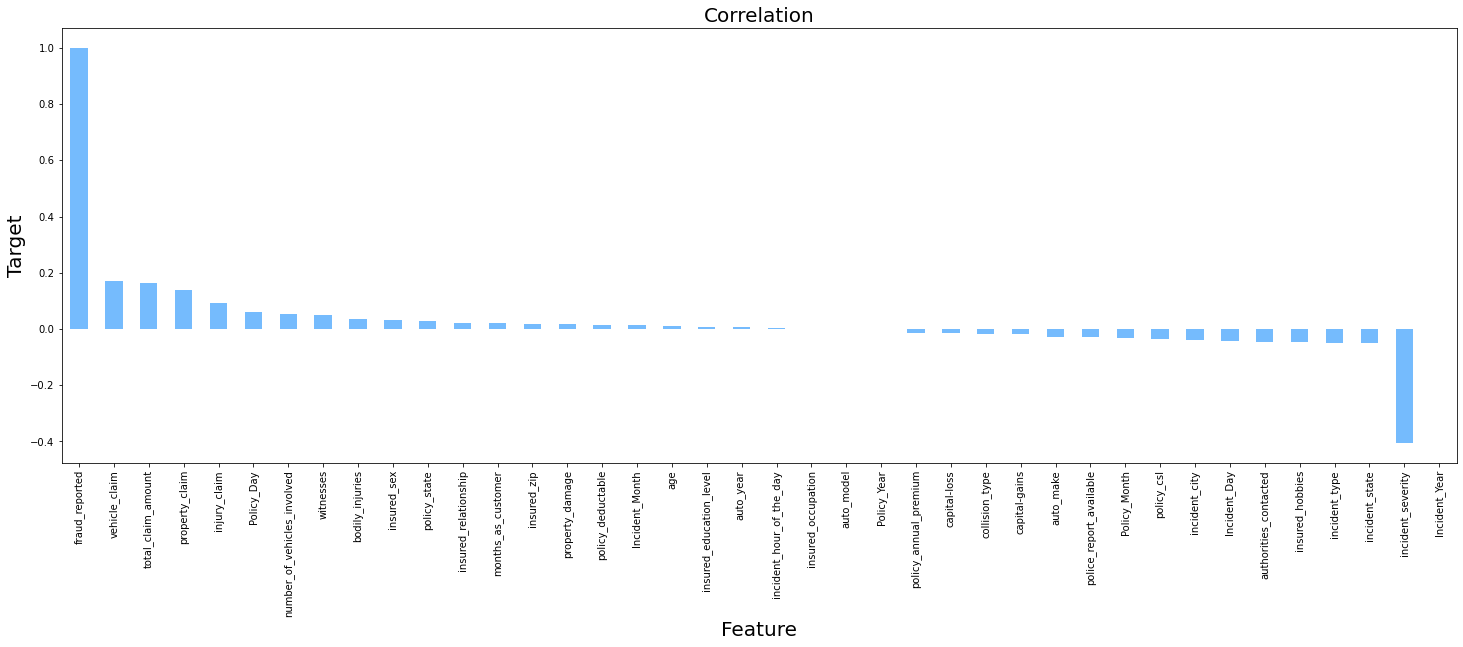

In [2243]:
# Checking Correlation of the input attributes with the Target variable 'fraud_reported' by Bar Plot

plt.figure(figsize=(25,8))
insurance.corr()['fraud_reported'].sort_values(ascending=False).plot(kind='bar',color='#75bbfd')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show()

In [2244]:
# Checking Correlation of the input attributes with the Target variable 'fraud_reported' 

insurance.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
authorities_contacted         -0.045802
Incident_Day                  -0.044151
incident_city                 -0.040403
policy_csl                    -0.037190
Policy_Month                  -0.030829
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
policy_annual_premium         -0.014480
Policy_Year                   -0.000059
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
Incident_Month                 0.014495
policy_deductable              0.014817
property_damage                0.017202


In [2245]:
# Dropping the feature Incident_Year

insurance.drop(['Incident_Year'],axis=1,inplace=True)
insurance.shape

(1000, 39)

### Observations

Features which are negatively correlated with target variable are incident_state,incident_type, insured_hobbies, authorities_contacted, incident_city, policy_csl, Policy_Month, police_report_available, auto_make, capital-gains,
collision_type, capital-loss,Incident_Day, policy_annual_premium and Policy_Year 

Features which are positively correlated with target variable are auto_model, insured_occupation, incident_hour_of_the_day, auto_year, insured_education_level, age,Incident_Month,
policy_deductable, property_damage, insured_zip, months_as_customer, insured_relationship, policy_state,Policy_Day 
insured_sex, bodily_injuries, witnesses, number_of_vehicles_involved, injury_claim, property_claim, 
total_claim_amount and vehicle_claim

number_of_vehicles_involved and incident_type are highly negatively correlated with each other

Dropped column Incident_Year, as it does not have any correlation with the target variable

## Outliers Treatment with Zscore

In [2246]:
# Removing outliers with zscore 

from scipy.stats import zscore

col= ['months_as_customer','age','policy_deductable','policy_annual_premium','insured_zip',
      'capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries',
      'witnesses','total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year','Policy_Year',
      'Policy_Month','Incident_Month','Incident_Day','Policy_Day']


z1 = insurance[col]
z1.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   insured_zip  capital-gains  capital-loss  incident_hour_of_the_day  \
0       466132          53300             0                         5   
1       468176              0             0                         8   
2       430632          35100             0                         7   
3       608117          48900        -62400                         5   
4       610706          66000        -46000                        20   

   number_of_vehicles_involved  bodily_injuries  ...  total_claim_amount  \
0                            1                1  ...               71610   
1                            1                0  ...                5070   
2                            3                2  ...               34650   
3                            1                1  ...               63400   
4                            1                0  ...                6500   

   injury_claim  property_claim  vehicle_claim  auto_year  Policy_Year  \
0          6510           13020          52080       2004         2014   
1           780             780           3510       2007         2006   
2          7700            3850          23100       2007         2000   
3          6340            6340          50720       2014         1990   
4          1300             650           4550       2009         2014   

   Policy_Month  Incident_Month  Incident_Day  Policy_Day  
0            10               1            25          17  
1             6               1            21          27  
2             6               2            22           9  
3             5              10             1          25  
4             6               2            17           6  

[5 rows x 21 columns]

In [2247]:
z = np.abs(zscore(z1))
threshold=3
print(np.where(z>3))

(array([229, 248, 500, 763, 807], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [2248]:
insurance_new = insurance[(z<3).all(axis=1)]

In [2249]:
insurance.shape

(1000, 39)

In [2250]:
insurance_new.shape

(995, 39)

In [2251]:
# Checking the dataloss

dataloss = (1000-995)/1000*100
dataloss

0.5

### Observations

After applying Zscore method to remove outliers against the threshold of 3, data loss is very minimal with 0.5% which is
in acceptable range below 10%

## Skewness

In [2252]:
# Checking the skewness of the dataset

insurance_new.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_zip                    0.824182
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.033901
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.855977
bodily_injuries                0.012979
witnesses                      0.027371


In [2253]:
# Applying sqrt method to reduce skewness in insured_zip

insurance_new['insured_zip'] = np.sqrt(insurance_new['insured_zip'])

In [2254]:
# Applying sqrt method to reduce skewness in total_claim_amount

insurance_new['total_claim_amount'] = np.sqrt(insurance_new['total_claim_amount'])

In [2255]:
# Applying sqrt method to reduce skewness in vehicle_claim

insurance_new['vehicle_claim'] = np.sqrt(insurance_new['vehicle_claim'])

In [2256]:
# Applying sqrt method to reduce skewness in Incident_Month

insurance_new['Incident_Month'] = np.sqrt(insurance_new['Incident_Month'])

In [2257]:
# Checking skewness

insurance_new.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_zip                    0.807897
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.033901
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.855977
bodily_injuries                0.012979
witnesses                      0.027371


In [2258]:
# Removing skewness using power transform method 

from sklearn.preprocessing import PowerTransformer 

skew =['insured_zip', 'vehicle_claim', 'Incident_Month','total_claim_amount']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
insurance_new[skew] = pt.fit_transform(insurance_new[skew].values)

In [2259]:
insurance_new.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_zip                    0.000000
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.033901
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.855977
bodily_injuries                0.012979
witnesses                      0.027371


In [2260]:
# Dropping the column insured_zip

insurance_new.drop(['insured_zip'],axis=1,inplace=True)

### Observations

Skewness was high in features 'insured_zip','total_claim_amount', 'vehicle_claim', 'Incident_Month'

Applied Sqrt method but skewness was not reduced, hence applied PowerTransformer(method='yeo-johnson') and skewness
reduced in all the features

After applying transformation methods insured zip value is becoming  0, hence dropping the column

## Variance inflation factor

In [2261]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = insurance_new.drop("fraud_reported",axis=1)
x.sample(5)

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
290                 284   42             2           0                500   
149                 193   41             2           1                500   
819                 356   47             1           1               2000   
800                  95   30             0           1               2000   
304                 286   47             1           1                500   

     policy_annual_premium  insured_sex  insured_education_level  \
290                1338.54            1                        0   
149                 847.03            0                        3   
819                1155.97            1                        2   
800                1370.92            1                        1   
304                1386.93            1                        2   

     insured_occupation  insured_hobbies  ...  property_claim  vehicle_claim  \
290                   6               11  ...           17120   88632.703460   
149                   2               16  ...           17280  101783.360027   
819                   9                4  ...           11180   55750.150478   
800                  13               18  ...            6960   28811.393232   
304                   8                3  ...            6580   57569.246802   

     auto_make  auto_model  auto_year  Policy_Year  Policy_Month  Policy_Day  \
290          3          25       1996         1995             4           5   
149         11          19       2011         1995             7          16   
819          4          30       2009         2005             8          23   
800          0          23       1999         1995             3          26   
304          0          33       2001         2002            11          20   

     Incident_Month  Incident_Day  
290        0.364251            29  
149        0.446222             2  
819        0.400265            23  
800        0.400265            14  
304        0.364251            17  

[5 rows x 37 columns]

In [2262]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

       VIF Factor                     Features
0       28.491114           months_as_customer
1      131.511664                          age
2        2.587633                 policy_state
3        2.467761                   policy_csl
4        4.650899            policy_deductable
5       29.409284        policy_annual_premium
6        1.922313                  insured_sex
7        3.455095      insured_education_level
8        3.816569           insured_occupation
9        4.128196              insured_hobbies
10       3.204540         insured_relationship
11       1.877821                capital-gains
12       1.985098                 capital-loss
13      11.104931                incident_type
14       3.111472               collision_type
15       3.209087            incident_severity
16       3.310602        authorities_contacted
17       3.399972               incident_state
18       3.198088                incident_city
19       4.216575     incident_hour_of_the_day
20      21.72

In [2263]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['months_as_customer','age','policy_annual_premium','number_of_vehicles_involved','total_claim_amount','injury_claim',
     'property_claim','vehicle_claim','auto_year','Policy_Year','Incident_Month']

st = StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

months_as_customer       age  policy_state  policy_csl  \
140            0.056786 -0.435627             2           0   
518           -0.073624  0.220782             0           1   
929           -0.595263 -0.763831             1           0   
740            1.569541  1.314796             1           1   
168            0.621896  0.767789             0           1   

     policy_deductable  policy_annual_premium  insured_sex  \
140               2000              -0.151044            1   
518               2000               2.260004            1   
929                500              -0.365715            0   
740               1000              -1.169689            0   
168                500               0.795918            0   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
140                        5                   6                4  ...   
518                        3                  10                4  ...   
929                        3                  11               19  ...   
740                        4                   2               15  ...   
168                        5                   6                3  ...   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  \
140       -0.552556      -0.033042          8          12   0.481649   
518       -0.542134      -0.011231          7          17   0.648109   
929        0.545984      -0.187295         12           9   0.481649   
740       -0.129399       0.489048         11          21   0.315188   
168       -1.400954      -1.735634         12          18   1.646873   

     Policy_Year  Policy_Month  Policy_Day  Incident_Month  Incident_Day  
140    -0.485856             8           3       -1.110894            21  
518    -0.078474             5           7       -1.110894            14  
929    -0.214268            12          27        0.829162             2  
740    -1.572209             7          20       -0.004979            18  
168     0.464702             3          29       -0.004979            21  

[5 rows x 37 columns]

In [2264]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

      VIF Factor                     Features
0       6.848841           months_as_customer
1       6.848368                          age
2       2.537767                 policy_state
3       2.435711                   policy_csl
4       4.310751            policy_deductable
5       1.036698        policy_annual_premium
6       1.909061                  insured_sex
7       3.336817      insured_education_level
8       3.597366           insured_occupation
9       3.976094              insured_hobbies
10      3.028844         insured_relationship
11      1.879051                capital-gains
12      1.988925                 capital-loss
13      9.980379                incident_type
14      3.033173               collision_type
15      3.090257            incident_severity
16      3.221809        authorities_contacted
17      3.309876               incident_state
18      3.126020                incident_city
19      3.973471     incident_hour_of_the_day
20      4.681330  number_of_vehicl

In [2265]:
# Applying decomposition method PCA

from sklearn.decomposition import PCA

m2 = ['total_claim_amount','injury_claim','property_claim','vehicle_claim']

pc = PCA(n_components=4)
x[m2] = pc.fit_transform(x[m2].values)
x.sample(5)

months_as_customer       age  policy_state  policy_csl  \
491           -1.742871  0.001979             0           0   
212            1.134842  1.205395             2           0   
162            0.787082  0.986592             2           2   
502           -0.021460 -0.107422             0           0   
213           -1.682013  0.111381             2           2   

     policy_deductable  policy_annual_premium  insured_sex  \
491               1000               0.288947            0   
212               1000               1.167931            1   
162               1000               0.310123            0   
502               2000              -0.519146            0   
213               2000              -0.165730            0   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
491                        2                   6               15  ...   
212                        2                  11               19  ...   
162                        4                   3               14  ...   
502                        0                   1                8  ...   
213                        4                   9               15  ...   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  \
491        0.191018      -0.002081          7          17   0.315188   
212       -0.541405      -0.010680         13          28   0.648109   
162       -0.140189       0.005169         13          28  -0.517116   
502        0.176342       0.001120          9          35  -0.017733   
213       -0.642294      -0.007007          4          27  -0.184194   

     Policy_Year  Policy_Month  Policy_Day  Incident_Month  Incident_Day  
491    -0.757444             5           9       -1.110894            13  
212     0.736290             7           2       -1.110894            24  
162    -1.300620             2          22       -1.110894            28  
502     1.007878             1          24        0.829162             2  
213    -0.078474             9           4       -1.110894            26  

[5 rows x 37 columns]

In [2266]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor                     Features
0     6.848841           months_as_customer
1     6.848368                          age
2     2.537767                 policy_state
3     2.435711                   policy_csl
4     4.310751            policy_deductable
5     1.036698        policy_annual_premium
6     1.909061                  insured_sex
7     3.336817      insured_education_level
8     3.597366           insured_occupation
9     3.976094              insured_hobbies
10    3.028844         insured_relationship
11    1.879051                capital-gains
12    1.988925                 capital-loss
13    9.980379                incident_type
14    3.033173               collision_type
15    3.090257            incident_severity
16    3.221809        authorities_contacted
17    3.309876               incident_state
18    3.126020                incident_city
19    3.973471     incident_hour_of_the_day
20    4.681330  number_of_vehicles_involved
21    1.463177              prop

### Observations

VIF is high in features months_as_customer','age','policy_annual_premium','number_of_vehicles_involved','total_claim_amount',
'injury_claim','property_claim','vehicle_claim','auto_year','Policy_Year' and 'Incident_Month

Applied scaling method standard scaler to standardize the features, VIF reduced in all features except 
'total_claim_amount','injury_claim','property_claim','vehicle_claim'

Instead of dropping those features, applied PCA method and VIF is below the threshold

## Applying SMOTE Technique

In [2267]:
#Splitting the features to x and y
    
x.shape

(995, 37)

In [2268]:
y = insurance_new['fraud_reported']
y.shape

(995,)

In [2269]:
# Checking the count of feature 'fraud_reported' 

plt.figure(figsize=(10,5))
ct = sns.countplot(y,palette='viridis')
for i in ct.containers:
    ct.bar_label(i,fontsize=12)

In [2270]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [2271]:
# Applying SMOTE technique 

smt = SMOTE()

x2,y2 = smt.fit_resample(x,y)

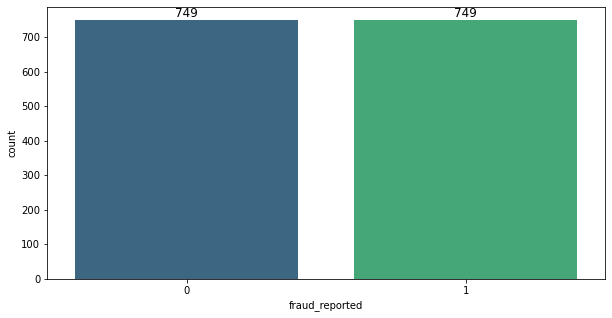

In [2272]:
# Checking the count of feature 'fraud_reported' after applying 'SMOTE'

plt.figure(figsize=(10,5))
sx=sns.countplot(y2,palette='viridis')
for i in sx.containers:
    sx.bar_label(i,fontsize=12)

### Observations

Target variable fraud_reported is imbalanced with 'No' - 749 and 'Yes' 246

Applied SMOTE technique to balance the target variable and above countplot shows target variable is balanced with equal numbers 

# Model Evaluation

In [2273]:
# Checking the dimension of the data 

x2.shape

(1498, 37)

In [2274]:
# Checking the dimension of the data 

y2.shape

(1498,)

In [2275]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding Random State

In [2276]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x2_train,y2_train)
    predrf = rf.predict(x2_test)
    acc = accuracy_score(y2_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 90.66666666666666 on Random State 78


## Train and Split

In [2277]:
# Training the Model with .30 as test size and random state at 78

x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30, random_state=78)

In [2278]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## GaussianNB

In [2279]:
GB = GaussianNB()
GB.fit(x2_train,y2_train)
print(GB.score(x2_train,y2_train))
GB_predict = GB.predict(x2_test)
cr1 = cross_val_score(GB,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,GB_predict)*100)
print('CV score of GaussianNB:',cr1.mean()*100)
print(confusion_matrix(y2_test,GB_predict))
print(classification_report(y2_test,GB_predict))

0.7356870229007634
Accuracy Score: 74.66666666666667
CV score of GaussianNB: 73.17056856187291
[[144  89]
 [ 25 192]]
              precision    recall  f1-score   support

           0       0.85      0.62      0.72       233
           1       0.68      0.88      0.77       217

    accuracy                           0.75       450
   macro avg       0.77      0.75      0.74       450
weighted avg       0.77      0.75      0.74       450



## LogisticRegression

In [2280]:
LR = LogisticRegression()
LR.fit(x2_train,y2_train)
print(LR.score(x2_train,y2_train))
LR_predict = LR.predict(x2_test)
cr2 = cross_val_score(LR,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,LR_predict)*100)
print('CV score of LogisticRegression:',cr2.mean()*100)
print(confusion_matrix(y2_test,LR_predict))
print(classification_report(y2_test,LR_predict))

0.5944656488549618
Accuracy Score: 57.77777777777777
CV score of LogisticRegression: 59.74916387959867
[[129 104]
 [ 86 131]]
              precision    recall  f1-score   support

           0       0.60      0.55      0.58       233
           1       0.56      0.60      0.58       217

    accuracy                           0.58       450
   macro avg       0.58      0.58      0.58       450
weighted avg       0.58      0.58      0.58       450



## SVC

In [2281]:
SV = SVC()
SV.fit(x2_train,y2_train)
print(SV.score(x2_train,y2_train))
SV_predict = SV.predict(x2_test)
cr3 = cross_val_score(SV,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,SV_predict)*100)
print('CV score of SVC:',cr3.mean()*100)
print(confusion_matrix(y2_test,SV_predict))
print(classification_report(y2_test,SV_predict))

0.5267175572519084
Accuracy Score: 53.11111111111111
CV score of SVC: 52.6066889632107
[[ 67 166]
 [ 45 172]]
              precision    recall  f1-score   support

           0       0.60      0.29      0.39       233
           1       0.51      0.79      0.62       217

    accuracy                           0.53       450
   macro avg       0.55      0.54      0.50       450
weighted avg       0.56      0.53      0.50       450



## RandomForestClassifier

In [2282]:
RFC = RandomForestClassifier()
RFC.fit(x2_train,y2_train)
print(RFC.score(x2_train,y2_train))
RFC_predict = RFC.predict(x2_test)
cr4 = cross_val_score(RFC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,RFC_predict)*100)
print('CV score of RandomForestClassifier:',cr4.mean()*100)
print(confusion_matrix(y2_test,RFC_predict))
print(classification_report(y2_test,RFC_predict))

1.0
Accuracy Score: 90.88888888888889
CV score of RandomForestClassifier: 86.18996655518394
[[213  20]
 [ 21 196]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       233
           1       0.91      0.90      0.91       217

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



## ExtraTreeClassifier

In [2283]:
ET = ExtraTreeClassifier()
ET.fit(x2_train,y2_train)
print(ET.score(x2_train,y2_train))
ET_predict = ET.predict(x2_test)
cr5 = cross_val_score(ET,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,ET_predict)*100)
print('CV score of RandomForestClassifier:',cr5.mean()*100)
print(confusion_matrix(y2_test,ET_predict))
print(classification_report(y2_test,ET_predict))

1.0
Accuracy Score: 77.11111111111111
CV score of RandomForestClassifier: 68.16566332218505
[[178  55]
 [ 48 169]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       233
           1       0.75      0.78      0.77       217

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.77      0.77      0.77       450



## DecisionTreeClassifier

In [2284]:
DTC = DecisionTreeClassifier()
DTC.fit(x2_train,y2_train)
print(DTC.score(x2_train,y2_train))
DTC_predict = DTC.predict(x2_test)
cr6 = cross_val_score(DTC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,DTC_predict)*100)
print('CV score of DecisionTreeClassifier:',cr6.mean()*100)
print(confusion_matrix(y2_test,DTC_predict))
print(classification_report(y2_test,DTC_predict))

1.0
Accuracy Score: 80.22222222222221
CV score of DecisionTreeClassifier: 81.31549609810479
[[191  42]
 [ 47 170]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       233
           1       0.80      0.78      0.79       217

    accuracy                           0.80       450
   macro avg       0.80      0.80      0.80       450
weighted avg       0.80      0.80      0.80       450



## KNeighborsClassifier

In [2285]:
KNC = KNeighborsClassifier()
KNC.fit(x2_train,y2_train)
print(KNC.score(x2_train,y2_train))
KNC_predict = KNC.predict(x2_test)
cr7 = cross_val_score(KNC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,KNC_predict)*100)
print('CV score of KNeighborsClassifier:',cr7.mean()*100)
print(confusion_matrix(y2_test,KNC_predict))
print(classification_report(y2_test,KNC_predict))

0.7624045801526718
Accuracy Score: 62.22222222222222
CV score of KNeighborsClassifier: 66.42274247491639
[[118 115]
 [ 55 162]]
              precision    recall  f1-score   support

           0       0.68      0.51      0.58       233
           1       0.58      0.75      0.66       217

    accuracy                           0.62       450
   macro avg       0.63      0.63      0.62       450
weighted avg       0.64      0.62      0.62       450



## GradientBoostingClassifier

In [2286]:
GBC = GradientBoostingClassifier()
GBC.fit(x2_train,y2_train)
print(GBC.score(x2_train,y2_train))
GBC_predict = GBC.predict(x2_test)
cr8 = cross_val_score(GBC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,GBC_predict)*100)
print('CV score of GradientBoostingClassifier:',cr8.mean()*100)
print(confusion_matrix(y2_test,GBC_predict))
print(classification_report(y2_test,GBC_predict))

0.9742366412213741
Accuracy Score: 87.77777777777777
CV score of GradientBoostingClassifier: 85.38840579710146
[[212  21]
 [ 34 183]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       233
           1       0.90      0.84      0.87       217

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



## AdaBoostClassifier

In [2287]:
ABC = AdaBoostClassifier()
ABC.fit(x2_train,y2_train)
print(ABC.score(x2_train,y2_train))
ABC_predict = ABC.predict(x2_test)
cr9 = cross_val_score(ABC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,ABC_predict)*100)
print('CV score of AdaBoostClassifier:',cr9.mean()*100)
print(confusion_matrix(y2_test,ABC_predict))
print(classification_report(y2_test,ABC_predict))

0.8874045801526718
Accuracy Score: 87.1111111111111
CV score of AdaBoostClassifier: 83.32285395763657
[[212  21]
 [ 37 180]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       233
           1       0.90      0.83      0.86       217

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



## BaggingClassifier

In [2288]:
BC = BaggingClassifier()
BC.fit(x2_train,y2_train)
print(BC.score(x2_train,y2_train))
BC_predict = BC.predict(x2_test)
cr10 = cross_val_score(BC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,BC_predict)*100)
print('CV score of BaggingClassifier:',cr10.mean()*100)
print(confusion_matrix(y2_test,BC_predict))
print(classification_report(y2_test,BC_predict))

0.9866412213740458
Accuracy Score: 85.77777777777777
CV score of BaggingClassifier: 84.32084726867336
[[210  23]
 [ 41 176]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       233
           1       0.88      0.81      0.85       217

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



## AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [2289]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

GaussianNB() 0.7514091889005361
LogisticRegression() 0.5786673523071142
RandomForestClassifier() 0.9086944482901842
ExtraTreeClassifier() 0.7713751705860249
DecisionTreeClassifier() 0.8015763137596171
KNeighborsClassifier() 0.6264907735210934
GradientBoostingClassifier() 0.8765946084927118
AdaBoostClassifier() 0.8696821660963984
BaggingClassifier() 0.856173730741085


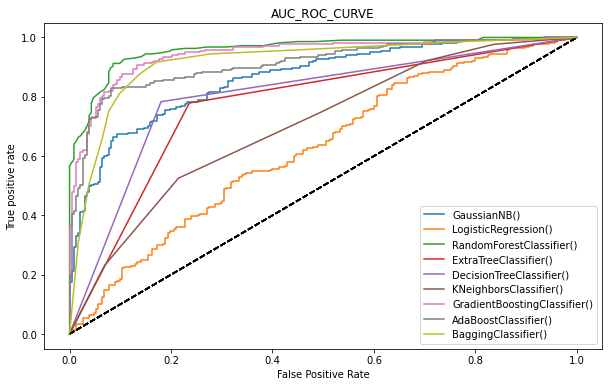

In [2290]:
model = [GB,LR,RFC,ET,DTC,KNC,GBC,ABC,BC]
auc=[]

plt.figure(figsize=(10,6))
for i in model:
    y_pred_prob = i.predict_proba(x2_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
    plt.plot(fpr,tpr,label=i )
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('AUC_ROC_CURVE')
    plt.legend()

for j in model:
    auc_score = roc_auc_score(y2_test,j.predict(x2_test))
    auc.append(auc_score)
    print(j,auc_score)

### Observations

Based on Model evaluation and AUC_ROC score RandomForestClassifier,GradientBoostingClassifier, Bagging Classifier and AdaBoost Classifier
are performing well.

Proceeding to Hyper Parameter Tuning for the above Model

## Hyper Parameter Tuning

### Hyper Parameter Tuning - RandomForestClassifier

In [2291]:
grid_params={'n_estimators':[50,100,150,200],'criterion':['gini','entropy','log_loss'],
            'max_depth':[5,10,20,50],'min_samples_split':[2,4,5],'max_features':['sqrt','log2']}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.8702392344497607
Best Params {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 150}


In [2307]:
# Applying parameters for RandomForestClassifier

Final_Model1 = RandomForestClassifier(criterion ='entropy',max_depth = 20,max_features ='log2',
                                      min_samples_split=4, n_estimators=150)
                                       
Final_Model1.fit(x2_train,y2_train)
pred1 = Final_Model1.predict(x2_test)
print(Final_Model1.score(x2_train,y2_train))
cr_v1= cross_val_score(Final_Model1,x2,y2,cv=5)

print('Accuracy_score',accuracy_score(y2_test,pred1)*100)
print('CV score of RandomForestClassifier:',cr_v1.mean()*100)
print(confusion_matrix(y2_test,pred1))
print(classification_report(y2_test,pred1))

1.0
Accuracy_score 90.88888888888889
CV score of RandomForestClassifier: 86.79063545150501
[[213  20]
 [ 21 196]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       233
           1       0.91      0.90      0.91       217

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



### Hyper Parameter Tuning - GradientBoostingClassifier

In [2293]:
grid_params={'n_estimators': [50,100,150,200],'loss':['log_loss','deviance','exponential'],
              'criterion':['friedman_mse','squared_error'],'min_samples_split':[2,4,5]}
             
        
gs = GridSearchCV(GradientBoostingClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.881658692185008
Best Params {'criterion': 'squared_error', 'loss': 'exponential', 'min_samples_split': 5, 'n_estimators': 200}


In [2310]:
# Applying parameters for GradientBoostingClassifier

Final_Model2 = GradientBoostingClassifier(n_estimators =200,criterion='squared_error',loss='exponential',
                                          min_samples_split=5)
                                       
Final_Model2.fit(x2_train,y2_train)
pred2 = Final_Model2.predict(x2_test)
print(Final_Model2.score(x2_train,y2_train))
cr_v2 = cross_val_score(Final_Model2,x2,y2,cv=5)

print('Accuracy_score',accuracy_score(y2_test,pred2)*100)
print('CV score of GradientBoostingClassifier:',cr_v2.mean()*100)
print(confusion_matrix(y2_test,pred2))
print(classification_report(y2_test,pred2))

0.9952290076335878
Accuracy_score 87.1111111111111
CV score of GradientBoostingClassifier: 85.59041248606466
[[214  19]
 [ 39 178]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       233
           1       0.90      0.82      0.86       217

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450



### Hyper Parameter Tuning - BaggingClassifier

In [2295]:
grid_params={'n_estimators':[50,100,150,200],
             'max_samples':[0.5, 0.7, 0.9],'max_features':[0.5, 0.7, 0.9,1.0,],'bootstrap':[bool,False]}
             
        
gs = GridSearchCV(BaggingClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'bootstrap': [<class 'bool'>, False],
                         'max_features': [0.5, 0.7, 0.9, 1.0],
                         'max_samples': [0.5, 0.7, 0.9],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.8931237183868763
Best Params {'bootstrap': False, 'max_features': 0.5, 'max_samples': 0.9, 'n_estimators': 150}


In [2317]:
# Applying parameters for BaggingClassifier

Final_Model3 = BaggingClassifier(max_features =0.5,max_samples = 0.9,n_estimators=150,bootstrap='False')
                                       
Final_Model3.fit(x2_train,y2_train)
pred3 = Final_Model3.predict(x2_test)
cr_v3 = cross_val_score(Final_Model3,x2,y2,cv=5)

print('Accuracy_score',accuracy_score(y2_test,pred3)*100)
print('CV score of BaggingClassifier:',cr_v3.mean()*100)
print(confusion_matrix(y2_test,pred3))
print(classification_report(y2_test,pred3))

Accuracy_score 88.22222222222223
CV score of BaggingClassifier: 85.5913043478261
[[214  19]
 [ 34 183]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       233
           1       0.91      0.84      0.87       217

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



### Hyper Parameter Tuning - AdaBoostClassifier

In [2297]:
grid_params={'n_estimators':[50,100,150,200],
             'algorithm':['SAMME','SAMME.R'],'learning_rate':[1.0,2.0,3.0]}
             
        
gs = GridSearchCV(AdaBoostClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1.0, 2.0, 3.0],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.8569013442697653
Best Params {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}


In [2319]:
# Applying parameters for AdaBoostClassifier

Final_Model4 = AdaBoostClassifier(algorithm ='SAMME.R',learning_rate =1.0,n_estimators=150)
                                       
Final_Model4.fit(x2_train,y2_train)
pred4 = Final_Model4.predict(x2_test)
cr_v4 = cross_val_score(Final_Model4,x2,y2,cv=5)

print('Accuracy_score',accuracy_score(y2_test,pred4)*100)
print('CV score of BaggingClassifier:',cr_v4.mean()*100)
print(confusion_matrix(y2_test,pred4))
print(classification_report(y2_test,pred4))

Accuracy_score 84.66666666666667
CV score of BaggingClassifier: 82.18862876254181
[[210  23]
 [ 46 171]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       233
           1       0.88      0.79      0.83       217

    accuracy                           0.85       450
   macro avg       0.85      0.84      0.85       450
weighted avg       0.85      0.85      0.85       450



### AUC_ROC_Curve_Final Model - RandomForestClassifier

In [2321]:
# Checking roc_auc_score for RandomForestClassifier

y_pred_prob_GBC = Final_Model1.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob_GBC,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,linestyle='--',color='#0485d1',label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,Final_Model1.predict(x2_test))
auc_score

0.9086944482901842

### Observations

Based on Hyper Parameter Tuning Random Forest Classifier is performing well with  Accuracy score 91%, Cross Validation 87%
and AUC_ROC Score of 90% which is better compared with other model

Saving the Final Model Random Forest Classifier for Prediction

## Saving the Final Model 

In [2322]:
# Saving the model using .pkl

import joblib

joblib.dump(Final_Model1,"Insurance_Claim_Fraud_Prediction.pkl")

['Insurance_Claim_Fraud_Prediction.pkl']

## Predicting the Model

In [2323]:
# Loading the saved model

Model=joblib.load("Insurance_Claim_Fraud_Prediction.pkl")

#Prediction
prediction = Model.predict(x2_test)
prediction

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [2324]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x2_test)[:],y2_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0            0         0
1            1         1
2            0         0
3            1         1
4            1         1
5            1         1
6            1         1
7            0         0
8            1         1
9            0         0
10           0         0
11           0         0
12           1         1
13           0         1
14           0         0
15           1         1
16           1         1
17           0         0
18           1         1
19           1         1
20           0         0
21           1         1
22           0         0
23           0         0
24           0         0
25           0         0
26           1         1
27           0         0
28           0         0
29           0         1
30           0         0
31           1         1
32           0         0
33           0         0
34           0         0
35           0         0
36           0         0
37           0         1
38           1         1
39           1         1
40           1         1
41           0         1
42           1         1
43           0         0
44           0         1
45           1         1
46           0         0
47           1         1
48           0         0
49           0         0
50           1         1
51           0         0
52           1         1
53           0         0
54           1         1
55           0         0
56           0         0
57           0         0
58           1         1
59           0         0
60           0         0
61           1         1
62           0         0
63           1         1
64           1         1
65           1         1
66           1         1
67           0         0
68           0         0
69           1         1
70           1         1
71           0         0
72           1         1
73           0         0
74           0         0
75           1         1
76           1         1
77           0         0
78           1         1
79           1         0
80           1         0
81           0         0
82           0         0
83           1         1
84           0         0
85           1         1
86           0         0
87           1         1
88           0         0
89           0         0
90           0         0
91           0         0
92           1         1
93           1         1
94           1         1
95           1         1
96           0         0
97           1         1
98           1         1
99           1         0
100          0         0
101          1         1
102          0         0
103          1         1
104          0         0
105          1         1
106          1         1
107          0         0
108          0         0
109          1         1
110          0         0
111          1         1
112          1         1
113          1         1
114          1         1
115          1         1
116          1         1
117          0         0
118          1         0
119          0         0
120          0         0
121          0         0
122          1         1
123          1         1
124          0         0
125          1         1
126          1         1
127          0         0
128          0         0
129          1         1
130          0         1
131          0         0
132          0         0
133          0         0
134          1         1
135          0         1
136          0         0
137          1         1
138          1         1
139          0         0
140          1         1
141          1         1
142          1         1
143          1         1
144          0         0
145          0         0
146          1         1
147          1         0
148          1         1
149          1         1
150          0         0
151          0         0
152          0         0
153          0         1
154          1         1
155          1         1
156          1         1
157          0         0
158          0         0
159  

# Conclusion

### Summary for Data Analysis

Insurance Claim Fraud Detection dataset contains 1000 rows and 40 columns

Dropped columns policy_bind_date and incident_date as it was split into Year,Month and Day

Null values present in the  feature _c39 was dropped and unknow values present in the features collision_type, property_damage and police_report_available 
were replaced by frequent value present in those features

In overall claims submitted, Female count is higher than Male and Maximum claims are submitted from the state of OH – Ohio

Total_claim_amount were the fraud_reported as 'Yes' are between 30000 to 10000 and fraud_reported total claim amount 
above 10000 are mostly submitted by Female

Insured education level as Associate,JD, MD, Masters and Insured occupation in Protective-serv, Transport moving, Tech-support, Prof-specialty
are the top contributors in submitting fradulent claim for high amount

Single-Vehicle Collision and Multi Vehicle Collision are high in incident type were fraud_reported as 'Yes' 
and total claim amount ranges between 40000 to 10000

Based on incident_severity, most of the fraud reported as 'Yes' are from Major Damage and Female count is higher than Male

Among authorities contacted, aggregated Total_claim_amount of fraud_reported as 'Yes' are high in 'Fire', 'Other' and 'Ambulance'.

Most of the fraud reported as 'Yes' with high claim amount are with customer’s

1. Whose policy_deductable amount is 500 and the claim amount ranges mostly above 50000 

2. Whose policy_annual_premium amount is between 1000 to 1600

3. Umbrella_limit between 3000000 to 8000000 

4. Capital gains between 30000 to 70000 

5. Capital loss between -30000 to -70000 

6. Policy_deductable amount is 500 and the claim amount ranges mostly above 50000 


Customer's who claimed for injury_claim and reported as fraud are mostly claiming amount(injury_claim amount) between 3000 to 15000 

Customer's who claimed for property_claim and reported as fraud are mostly claiming amount(property_claim amount) between 3000 to 20000 

Customer's who claimed for vehicle_claim and reported as fraud are mostly claiming amount(vehicle_claim amount) between 30000 to 80000 

Customer's who are in the age group of early 20's and 36 to 65 are maximum who are claiming for high claim amount

### Summary for Model Evaluation

Feature with Null values _c39 and policy_number has been dropped

Replaced unknown values in the features 'collision_type','property_damage' and 'police_report_available' by the most frequent value in their respective features

Dropped column umbrella_limit, as the negative value in the data affects the feature and 25%, 50% and 75% is 0,
moreover the difference between 75% to Max is huge
Model performance improved after dropping umbrella_limit from the dataset

Dropped column Incident_Year, as it does not have any correlation with the target variable

Encoded Categorical columns to numerial by Label Encoder
Tried applying One Hot Encoder but there was no much improvement in Model performance, hence kept Label Encoder

Skewness was high in features 'insured_zip','total_claim_amount', 'vehicle_claim', 'Incident_Month'

Applied Sqrt method but skewness was not reduced, hence applied PowerTransformer(method='yeo-johnson') and 
skewness reduced in all the features

Dropped the column insured_zip as the value becomes 0 after applying transformation method, before dropping the column
tried with 'cbrt' method to the feature insured_zip but skewness was not reduced below threshold and Model performance was 
not improved, hence dropped the column for better performance of the Model

Scaling method Standard Scaler was applied to standardize the features but VIF was still high in columns 
'total_claim_amount','injury_claim','property_claim' and 'vehicle_claim', hence applied PCA method to those features instead of
dropping them.

Tried evaluating the Model performance by not applying PCA method and dropping features with high VIF but the performance
of the Model accuracy and Cross Validation score was not improved, hence applied PCA method and performance of the Model
improved across all the Models

Target variable fraud_reported is imbalanced with 'No' - 749 and 'Yes' 246, applied SMOTE technique to balance the target variable 

Finally, 1498 rows 37 columns were utilized to build and predict 'fraud_reported'

For Model Evaluation 70/30 is the train,test size used for evaluating the Model with random_state= 110

Random Forest Classifier model performed well, Moreover we can observe other models GradientBoostingClassifier, Bagging Classifier and 
AdaBoost Classifier performance were close with Random Forest Classifier, hence applied hyper parameter tuning for all these Models

Based on Hyper Parameter Tuning Random Forest Classifier performance was good with Accuracy score 91%, 
Cross Validation 87% and AUC_ROC Score of 90% which is better compared with other model and below classification report is also good compared with other models after tuning

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       233
           1       0.91      0.90      0.91       217

    accuracy                           0.91       450
    
    macroavg       0.91      0.91      0.91       450

weighted avg       0.91      0.91      0.91       450


When we compare Predicted Vs Original we can observe RandomForestClassifier is performing well and prediction 
is same with original

Concluded Random Forest Classifier is the best fit model to predict 'fraud_reported' for the 
Insurance Claim Fraud Detection dataset and this Model can be used to detect similar Insurance Claim Fraud 

Thank you for Providing the opportunity to work on the Insurance Claim Fraud Detection dataset